In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.9


In [2]:
import os
import numpy as np
import pandas as pd

### Carregar os dados e Verificações Básicas

In [3]:
dataset_train = pd.read_csv("projeto8-data_files/projeto8-training.csv")

In [4]:
pd.set_option('display.max_rows', None)  # Exibe todas as linhas no log
pd.set_option('display.max_columns', None)  # Exibe todas as colunas no log
dataset_train.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.03,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [5]:
dataset_train.shape

(14803, 32)

In [6]:
dataset_train.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

##### Análise Exploratória

In [7]:
import matplotlib.pyplot as plt

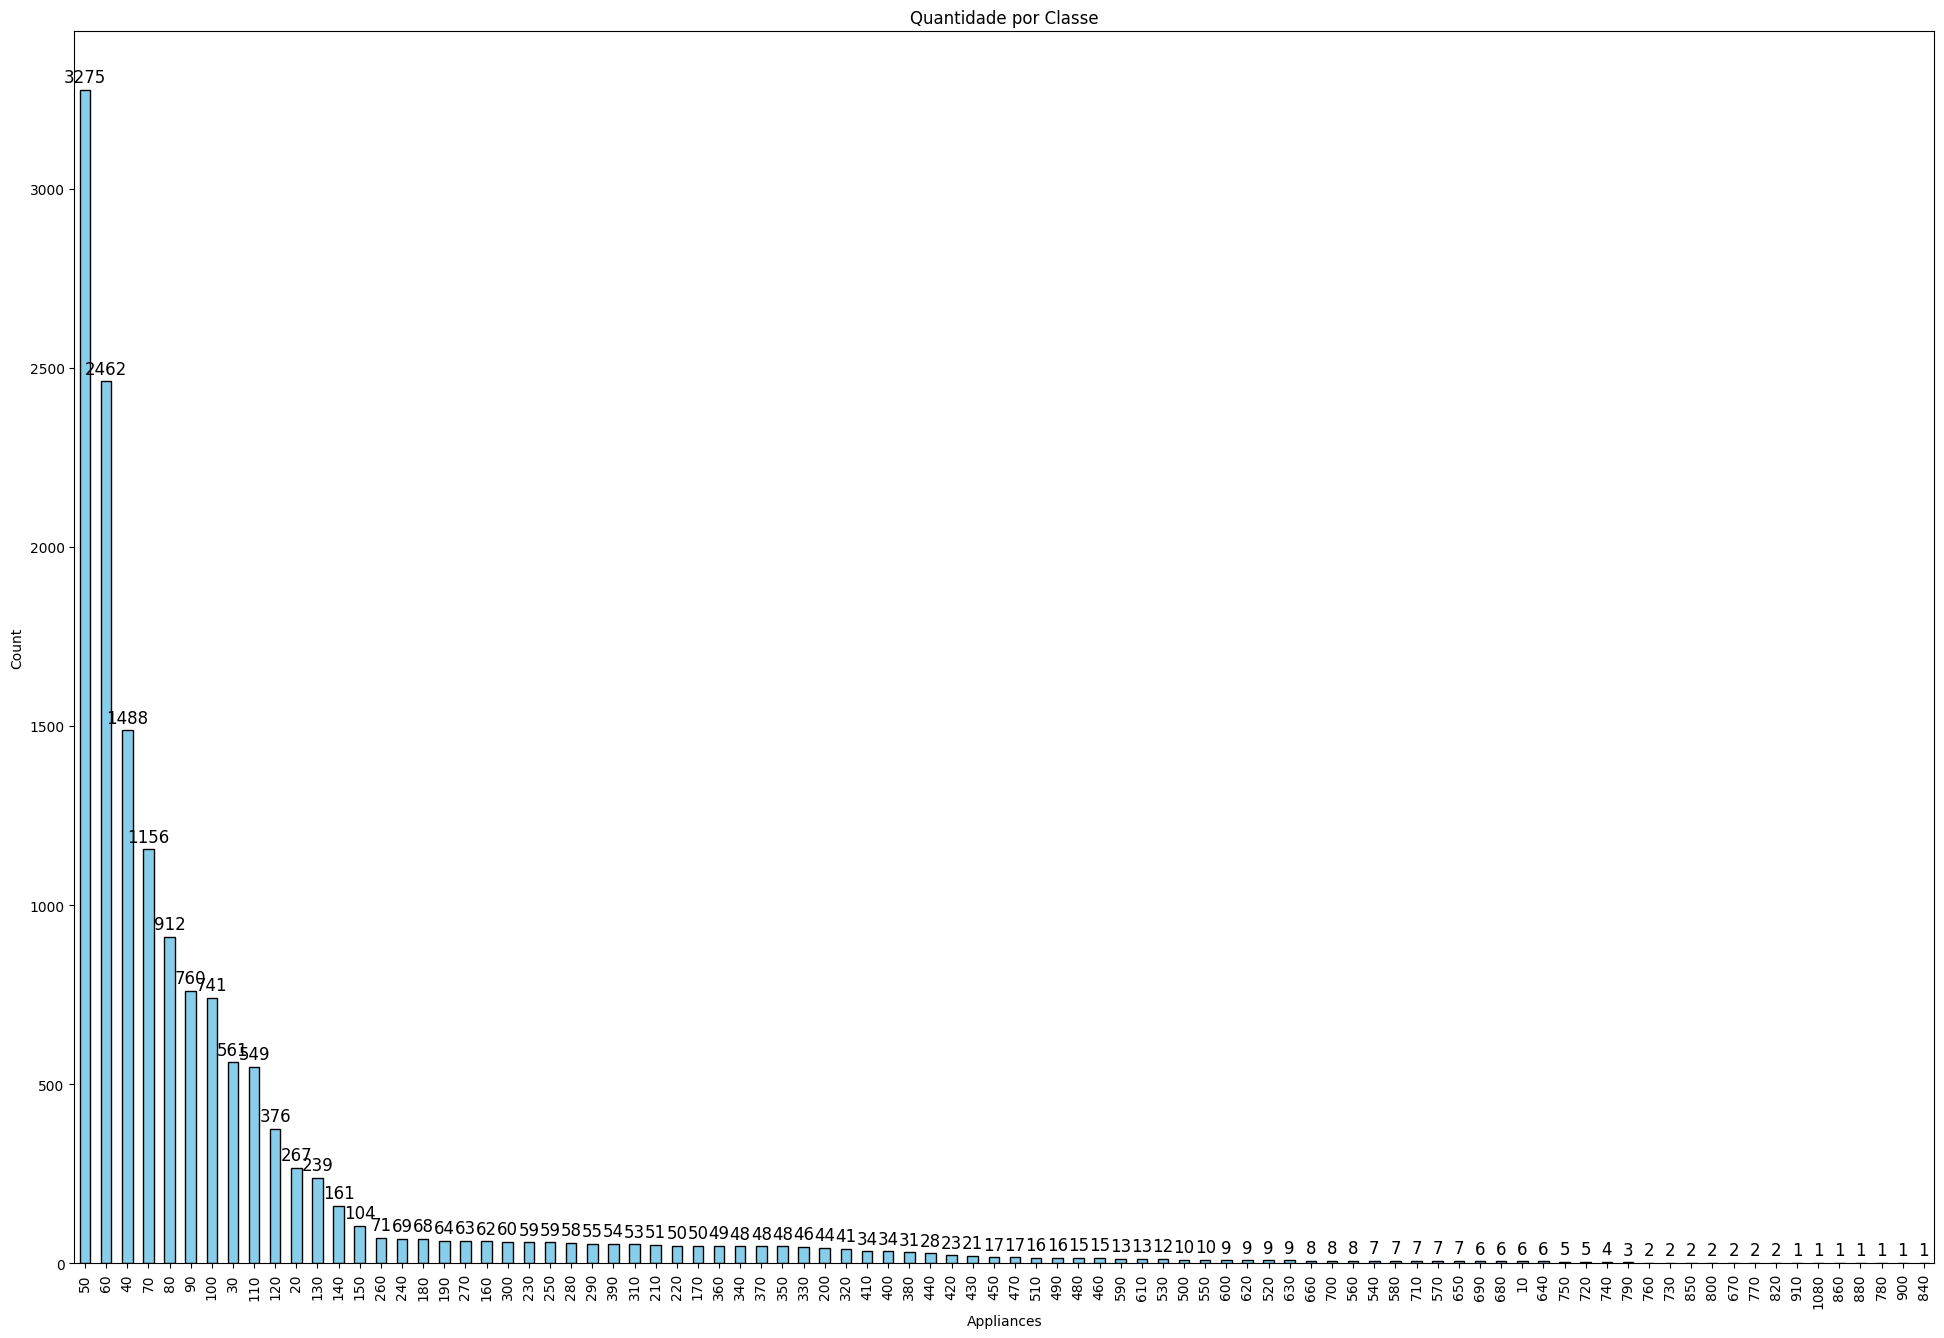

In [8]:
# Quantidade por Appliances:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Appliances")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = dataset_train["Appliances"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

In [9]:
dataset_train["Appliances"].unique()

array([  60,   50,   70,  430,  250,  100,   90,   80,  140,  120,  110,
        400,  390,  240,   40,   30,  310,  380,   20,  260,  450,  190,
        220,  290,  130,  370,  210,  230,  200,  180,  350,  300,  150,
        330,  420,  360,  270,  170,  340,  550,  620,  610,  490,  410,
        740,  910,  510,  790,  500,  160,  480,  280,  560, 1080,  750,
        470,  320,  440,  460,  800,  540,  530,  600,   10,  570,  590,
        850,  710,  680,  520,  580,  630,  670,  640,  650,  700,  660,
        690,  770,  720,  760,  860,  780,  880,  730,  900,  820,  840])

In [10]:
len(dataset_train["Appliances"].unique())

88

##### Transformação dos dados categóricos em numéricos(Feature Engineering)

In [11]:
dataset_train["WeekStatusId"],_ = pd.factorize(dataset_train["WeekStatus"])
dataset_train["Day_of_weekId"],_ = pd.factorize(dataset_train["Day_of_week"])

In [12]:
dataset_train.head(30)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,WeekStatusId,Day_of_weekId
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday,0,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday,0,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday,0,0
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday,0,0
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday,0,0
5,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,65400,Weekday,Monday,0,0
6,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,66000,Weekday,Monday,0,0
7,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.100000,48.590000,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,66600,Weekday,Monday,0,0
8,2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,46.363333,17.100000,55.090000,6.123333,88.590000,17.823333,45.493333,18.066667,48.560000,16.963333,45.290000,6.000000,734.500000,91.000000,6.000000,40.000000,4.600000,34.351142,34.351142,68400,Weekday,Monday,0,0
9,2016-01-11 19:10:00,250,40,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.000000,47.223333,17.100000,55.163333,6.067500,88.215000,17.963333,46.160000,18.033333,48.666667,16.890000,45.326667,6.000000,734.616667,90.500000,6.000000,40.000000,4.516667,19.205186,19.205186,69000,Weekday,Monday,0,0


In [13]:
import seaborn as sns

<Axes: >

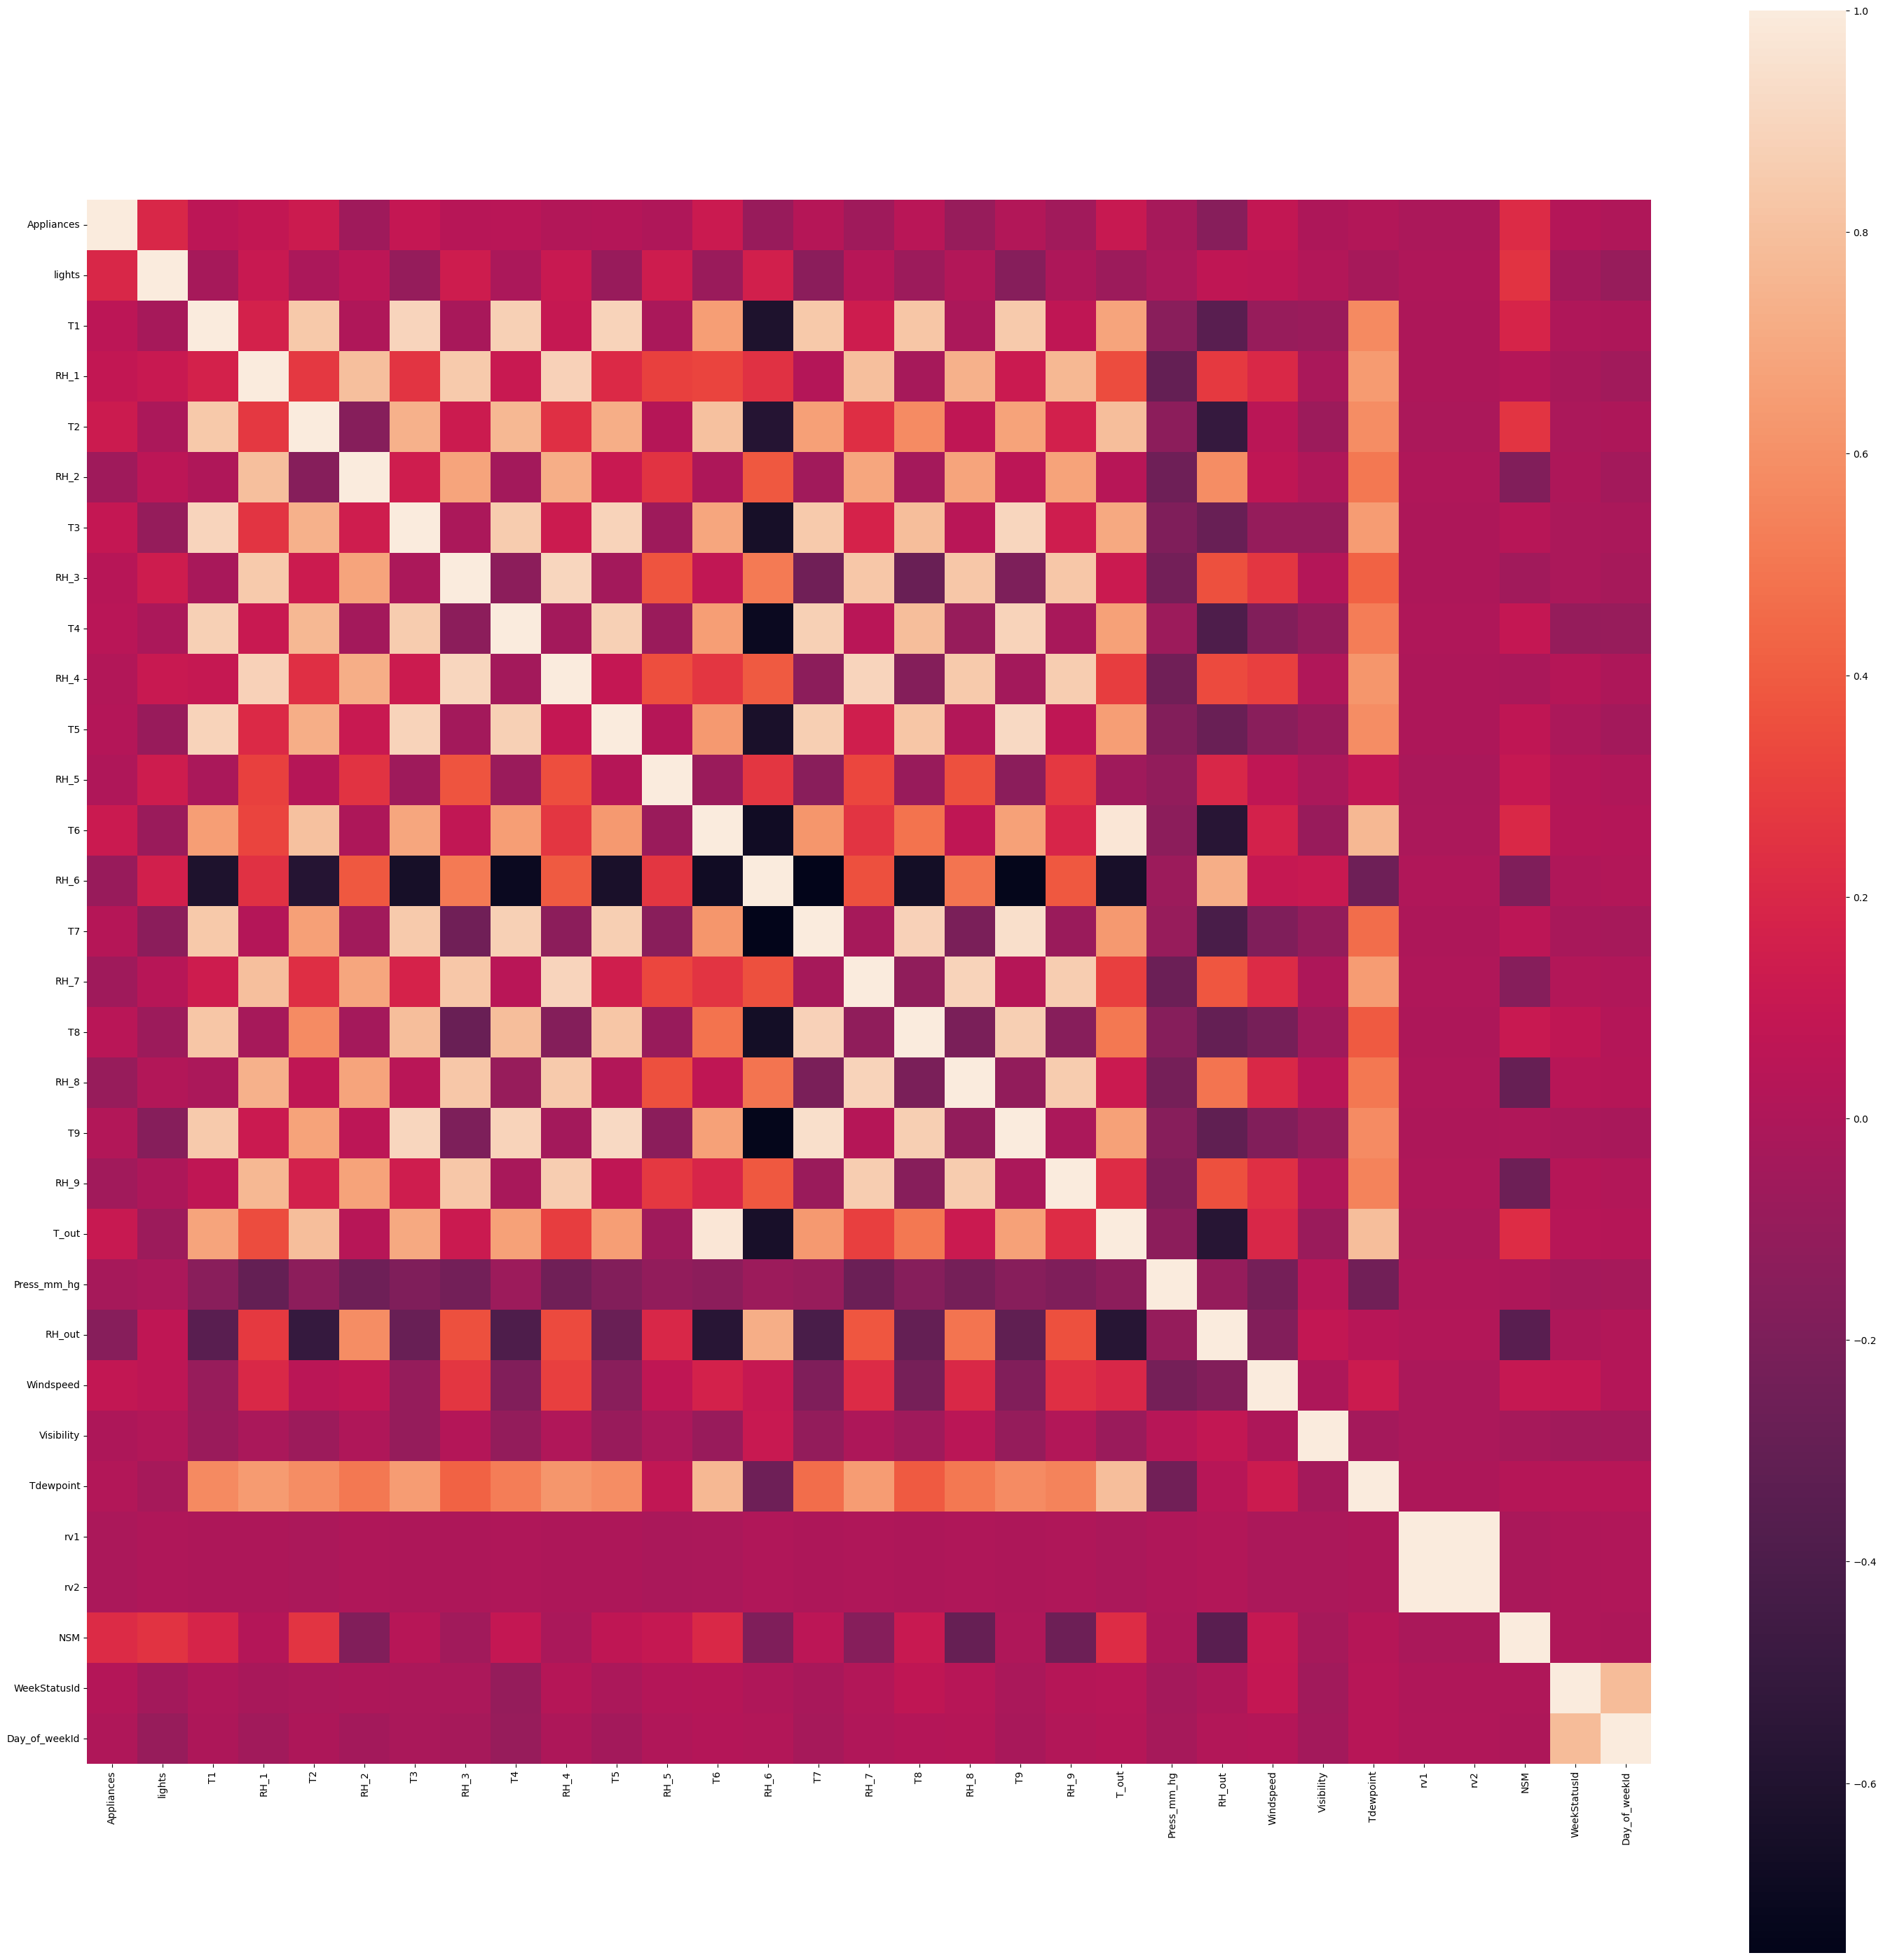

In [14]:
# Matriz de correlação
plt.figure(figsize = (36, 36))

sns.heatmap(dataset_train[[
    "Appliances",
    "lights",
    "T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out",
    "Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2","NSM","WeekStatusId","Day_of_weekId"
]].corr(), vmax=1., square=True)

##### contar as colunas com correlação muito baixa com outras colunas:

In [15]:
def see_count_values_by_coulumn(dataset_train, column_name):
    count_values_type = dataset_train[column_name].value_counts()
    print(count_values_type)

In [16]:
see_count_values_by_coulumn(dataset_train, "Appliances")

Appliances
50      3275
60      2462
40      1488
70      1156
80       912
90       760
100      741
30       561
110      549
120      376
20       267
130      239
140      161
150      104
260       71
240       69
180       68
190       64
270       63
160       62
300       60
230       59
250       59
280       58
290       55
390       54
310       53
210       51
220       50
170       50
360       49
340       48
370       48
350       48
330       46
200       44
320       41
410       34
400       34
380       31
440       28
420       23
430       21
450       17
470       17
510       16
490       16
480       15
460       15
590       13
610       13
530       12
500       10
550       10
600        9
620        9
520        9
630        9
660        8
700        8
560        8
540        7
580        7
710        7
570        7
650        7
690        6
680        6
10         6
640        6
750        5
720        5
740        4
790        3
760        2
730        2
8

In [17]:
see_count_values_by_coulumn(dataset_train, "lights")

lights
0     11457
10     1621
20     1240
30      420
40       57
50        8
Name: count, dtype: int64


In [18]:
#see_count_values_by_coulumn(dataset_train, "RH_6")

In [19]:
#see_count_values_by_coulumn(dataset_train, "T6")

In [20]:
#see_count_values_by_coulumn(dataset_train, "T_out")

In [21]:
see_count_values_by_coulumn(dataset_train, "RH_out")

RH_out
95.000000     351
92.000000     269
88.000000     259
91.000000     255
93.000000     239
94.000000     239
96.000000     231
97.000000     230
89.000000     225
90.000000     199
86.000000     192
87.000000     185
82.000000     175
99.000000     160
84.000000     138
81.000000     137
85.000000     133
83.000000     126
80.000000     122
79.000000     120
71.000000     102
76.000000      98
91.666667      97
66.000000      97
70.000000      96
72.000000      96
78.000000      94
90.333333      93
68.000000      91
74.000000      91
73.000000      91
89.666667      91
91.333333      90
95.666667      90
67.000000      90
92.333333      89
77.000000      88
90.666667      87
90.500000      86
89.333333      86
98.000000      83
95.333333      82
88.666667      81
87.666667      80
75.000000      80
94.333333      78
88.333333      77
96.666667      76
65.000000      76
96.333333      74
88.500000      73
93.333333      73
89.500000      72
95.500000      72
92.666667      71
93.

In [22]:
see_count_values_by_coulumn(dataset_train, "Press_mm_hg")

Press_mm_hg
757.300000    103
756.200000     77
755.800000     77
764.500000     76
760.300000     74
757.000000     72
760.000000     70
756.600000     70
751.300000     66
754.300000     65
766.000000     65
752.500000     64
764.800000     61
752.800000     61
756.100000     60
760.700000     60
754.000000     56
755.500000     55
751.000000     54
759.600000     54
750.600000     52
761.800000     49
756.400000     49
751.700000     48
761.500000     48
756.900000     48
760.600000     47
752.100000     46
748.900000     45
754.600000     45
763.600000     44
758.100000     44
759.800000     44
757.700000     44
758.500000     43
751.600000     43
748.600000     43
761.100000     40
766.600000     39
753.900000     38
753.800000     37
762.200000     37
762.100000     37
755.700000     37
756.300000     37
762.500000     36
761.400000     36
766.700000     35
763.700000     34
748.000000     34
744.100000     34
748.800000     33
751.900000     33
750.200000     33
755.000000     3

##### Remover algumas linhas com certa baixa quantidade:

In [23]:
#remover uma certa quantidade de valores para para valores com muita frequencia em relação a coluna:
def remove_qtd_max_frequency_by_column(dataset_train, qtd_max, column):
    value_max_frequency_for_value_type = qtd_max

    # Contar a quantidade de ocorrências de cada valor da coluna
    count_values_type = dataset_train[column].value_counts()

    # Filtrar as colunas por frequencia
    valid_columns = count_values_type[count_values_type > value_max_frequency_for_value_type].index

    # Manter apenas as linhas cujo "column" está na lista de genes válidos
    dataset_train = dataset_train[dataset_train[column].isin(valid_columns)]
    return dataset_train

In [24]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 5, "Appliances")
see_count_values_by_coulumn(dataset_train, "Appliances")

Appliances
50     3275
60     2462
40     1488
70     1156
80      912
90      760
100     741
30      561
110     549
120     376
20      267
130     239
140     161
150     104
260      71
240      69
180      68
190      64
270      63
160      62
300      60
250      59
230      59
280      58
290      55
390      54
310      53
210      51
170      50
220      50
360      49
340      48
350      48
370      48
330      46
200      44
320      41
410      34
400      34
380      31
440      28
420      23
430      21
450      17
470      17
490      16
510      16
480      15
460      15
610      13
590      13
530      12
550      10
500      10
630       9
620       9
600       9
520       9
560       8
660       8
700       8
540       7
650       7
580       7
570       7
710       7
680       6
10        6
640       6
690       6
Name: count, dtype: int64


In [25]:
see_count_values_by_coulumn(dataset_train, "T_out")

T_out
 9.800000e+00    85
 1.010000e+01    82
 9.600000e+00    82
 5.000000e+00    80
 5.500000e+00    80
 2.500000e+00    68
 6.800000e+00    66
 5.300000e+00    66
 3.700000e+00    65
 3.000000e+00    64
 2.700000e+00    63
 5.100000e+00    63
 6.300000e+00    62
 4.800000e+00    61
 8.600000e+00    60
 4.600000e+00    60
 4.500000e+00    59
 6.000000e+00    58
 4.000000e+00    57
 8.800000e+00    57
 1.110000e+01    56
 6.100000e+00    56
 1.030000e+01    55
 2.200000e+00    54
 5.900000e+00    54
 7.000000e+00    53
 8.100000e+00    53
 3.200000e+00    53
 6.400000e+00    53
 6.500000e+00    53
 8.300000e+00    52
 8.000000e+00    52
 5.400000e+00    52
 1.060000e+01    49
 7.300000e+00    49
 9.300000e+00    49
 9.500000e+00    48
 7.600000e+00    47
 5.600000e+00    47
 9.100000e+00    46
 3.500000e+00    46
 7.100000e+00    44
 1.210000e+01    44
 5.800000e+00    43
 8.500000e+00    42
 7.800000e+00    42
 9.000000e+00    42
 1.000000e+01    41
 7.500000e+00    41
 7.900000e+00 

In [26]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 20, "lights")
see_count_values_by_coulumn(dataset_train, "lights")

lights
0     11437
10     1612
20     1233
30      418
40       57
Name: count, dtype: int64


In [27]:
#see_count_values_by_coulumn(dataset_train, "T_out")

In [28]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "RH_6")
see_count_values_by_coulumn(dataset_train, "RH_6")

RH_6
1.000000     1092
99.900000     564
92.300000      43
92.190000      29
87.690000      27
52.500000      23
96.090000      20
97.000000      19
98.590000      19
96.400000      18
93.400000      17
92.400000      16
92.123333      16
92.500000      15
93.190000      15
92.000000      14
92.590000      14
91.690000      14
99.190000      14
77.690000      14
96.900000      13
96.690000      13
52.590000      12
81.590000      12
87.763333      12
91.900000      12
76.400000      11
77.300000      11
87.866667      10
93.366667      10
95.900000      10
96.190000      10
92.433333      10
96.500000      10
93.690000      10
77.090000       9
50.200000       9
87.933333       9
96.933333       9
92.333333       9
99.590000       9
95.190000       9
94.400000       9
81.560000       9
93.030000       9
88.433333       9
55.900000       9
95.590000       9
96.226667       9
94.500000       9
92.060000       8
92.530000       8
55.200000       8
87.800000       8
87.833333       8
78.50

In [29]:
#see_count_values_by_coulumn(dataset_train, "T_out")

In [30]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "T6")
see_count_values_by_coulumn(dataset_train, "T6")

T6
 6.400000     51
 5.590000     48
 10.190000    45
 6.300000     44
 9.100000     44
 6.090000     43
 8.390000     42
 5.690000     41
 9.000000     41
 6.190000     39
 9.600000     37
 6.500000     37
 8.300000     36
 9.690000     36
 2.900000     36
 8.000000     35
 5.500000     35
 2.400000     34
 0.700000     33
 3.790000     33
 8.100000     32
 2.500000     31
 8.800000     31
 2.790000     30
 5.300000     29
 6.000000     29
 9.390000     29
 8.500000     29
 0.800000     28
 1.790000     28
 7.500000     28
 2.590000     28
 3.700000     27
 3.090000     27
 9.500000     27
 4.690000     27
 2.700000     26
 3.900000     26
 4.000000     26
 5.400000     26
 5.800000     26
 7.900000     25
 8.890000     25
 1.100000     25
 4.366667     25
 10.800000    25
 10.500000    25
 7.590000     25
 0.500000     24
 3.400000     24
 1.290000     24
 6.690000     24
 2.290000     24
 4.190000     24
 9.800000     23
 1.900000     23
 1.600000     23
 6.590000     23
 3.590000  

In [31]:
#see_count_values_by_coulumn(dataset_train, "T_out")

In [32]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 2, "T_out")
see_count_values_by_coulumn(dataset_train, "T_out")

T_out
 2.500000     57
 5.000000     54
 5.500000     53
 2.700000     51
 10.100000    51
 9.800000     50
 3.700000     50
 9.600000     49
 3.000000     47
 4.800000     44
 8.600000     43
 5.100000     43
 5.300000     41
 4.500000     40
 2.200000     40
 5.900000     39
 8.100000     38
 4.000000     37
 3.200000     36
 4.600000     36
 6.000000     34
 6.500000     34
 5.600000     34
 8.000000     33
 5.400000     33
 6.100000     31
 6.400000     31
 0.600000     31
 11.100000    31
 3.500000     30
 1.700000     29
 7.500000     29
 6.800000     28
 6.300000     28
 7.100000     28
 8.500000     28
 0.300000     28
 8.800000     28
 7.900000     28
 9.000000     27
 8.300000     27
 0.800000     27
 9.100000     26
 2.900000     26
 7.300000     26
 7.000000     25
 1.200000     25
 3.100000     25
 1.300000     24
 9.500000     24
 4.900000     24
 8.400000     24
 4.700000     24
 2.400000     24
 7.800000     24
 9.300000     23
 1.800000     23
 5.200000     23
 5.70000

In [33]:
#see_count_values_by_coulumn(dataset_train, "T_out")
# pode ser q as linhas removidas acima também sejam de T_out

In [34]:
dataset_train.dtypes

date              object
Appliances         int64
lights             int64
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
NSM                int64
WeekStatus        object
Day_of_week       object
WeekStatusId       int64
Day_of_weekId      int64
dtype: object

T2, T4, T7, T8, T9, Rh_6 ainda se relacionam ruim entre eles e outras variações de temperatura e umidade relativa, então remover alguns com pouca frequencia para melhorar isso, pois com os outros houve melhora na cor da matriz de corelação 

In [35]:
see_count_values_by_coulumn(dataset_train, "T2") #2

T2
19.200000    161
19.500000    160
19.600000    144
19.290000    128
19.700000    122
19.000000    122
18.790000    121
19.790000    121
18.390000    116
20.200000    116
19.100000    115
18.500000    114
20.290000    112
20.390000    111
20.500000    111
19.390000    109
20.000000    108
20.100000    105
18.600000     98
18.890000     97
19.890000     97
18.200000     94
20.600000     92
18.100000     92
18.700000     91
20.890000     90
20.700000     89
21.100000     80
21.700000     74
20.790000     72
21.200000     71
18.000000     71
18.290000     71
17.790000     70
21.000000     68
21.500000     66
21.890000     64
21.290000     62
17.500000     61
17.700000     61
17.890000     59
17.600000     57
17.100000     56
21.600000     53
19.566667     50
17.200000     46
21.790000     46
17.290000     43
22.000000     40
17.390000     38
19.323333     36
22.100000     35
22.200000     35
16.700000     34
22.700000     34
18.823333     34
19.260000     33
21.390000     33
19.066667  

In [36]:
see_count_values_by_coulumn(dataset_train, "T4") #3

T4
20.100000    156
20.600000    148
20.290000    146
19.790000    140
20.390000    139
19.890000    135
19.700000    132
20.000000    127
20.200000    125
20.500000    125
21.000000    124
20.700000    121
19.500000    117
19.600000    115
21.200000    115
19.100000    114
21.100000    109
19.290000    109
19.390000    109
21.500000    107
20.790000    106
19.200000    104
21.290000    103
20.890000    102
18.700000     98
18.790000     98
19.000000     94
21.390000     91
21.600000     86
18.890000     85
18.390000     79
22.790000     74
18.600000     72
22.100000     66
18.200000     65
18.500000     62
21.700000     60
22.000000     58
18.290000     58
21.790000     56
21.890000     55
23.500000     51
22.890000     48
18.100000     47
22.500000     47
22.600000     45
23.100000     43
22.700000     42
22.390000     42
23.390000     42
22.290000     41
23.600000     41
18.000000     39
23.000000     36
25.100000     36
17.700000     35
17.790000     35
23.200000     33
17.890000  

In [37]:
see_count_values_by_coulumn(dataset_train, "T7") #2

T7
18.500000    204
19.200000    196
19.290000    165
19.000000    129
18.390000    129
18.600000    126
19.100000    125
20.000000    124
20.100000    114
21.390000    113
19.500000    111
18.700000    110
20.200000    103
19.600000    102
18.290000    100
21.290000    100
21.000000     99
19.700000     99
17.890000     98
19.390000     95
20.290000     95
18.790000     94
19.790000     93
17.790000     91
20.390000     90
18.200000     88
20.700000     84
18.100000     84
21.100000     81
20.600000     80
21.600000     80
21.200000     76
20.790000     76
17.700000     76
20.890000     76
23.200000     74
19.890000     73
18.890000     73
17.500000     73
21.700000     71
21.500000     63
21.790000     63
18.000000     62
20.500000     60
15.600000     54
16.290000     47
17.600000     47
17.390000     46
23.100000     45
16.200000     44
22.000000     42
23.390000     42
23.500000     41
21.890000     36
23.600000     32
22.790000     32
22.200000     31
22.500000     31
22.700000  

In [38]:
see_count_values_by_coulumn(dataset_train, "T8") #1

T8
22.790000    149
21.790000    130
21.390000    119
21.890000    111
21.700000    107
21.290000    105
22.700000    105
21.500000    102
22.200000    101
21.600000    101
22.290000    100
22.600000     99
23.100000     98
22.390000     95
22.890000     93
23.000000     93
23.500000     92
23.290000     92
21.200000     91
22.000000     88
23.390000     88
20.500000     87
22.500000     86
22.100000     82
20.700000     81
20.790000     80
23.200000     80
20.200000     76
21.000000     74
20.600000     73
20.890000     70
23.600000     67
19.790000     66
20.390000     65
20.290000     64
19.700000     63
21.100000     63
23.890000     60
23.700000     60
23.790000     56
24.290000     55
24.500000     52
19.390000     48
20.100000     46
20.000000     42
24.200000     40
24.390000     38
24.000000     38
18.290000     37
24.600000     37
19.890000     36
19.500000     33
21.533333     30
18.100000     30
19.600000     30
24.100000     29
18.390000     28
19.290000     28
18.500000  

In [39]:
#see_count_values_by_coulumn(dataset_train, "Rh_6")

In [40]:
# agora remover certa quantidade destes:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "T2")
see_count_values_by_coulumn(dataset_train, "T2")

T2
19.200000    161
19.500000    160
19.600000    144
19.290000    128
19.000000    122
19.700000    122
18.790000    121
19.790000    121
20.200000    116
18.390000    116
19.100000    115
18.500000    114
20.290000    112
20.500000    111
20.390000    111
19.390000    109
20.000000    108
20.100000    105
18.600000     98
19.890000     97
18.890000     97
18.200000     94
20.600000     92
18.100000     92
18.700000     91
20.890000     90
20.700000     89
21.100000     80
21.700000     74
20.790000     72
21.200000     71
18.000000     71
18.290000     71
17.790000     70
21.000000     68
21.500000     66
21.890000     64
21.290000     62
17.700000     61
17.500000     61
17.890000     59
17.600000     57
17.100000     56
21.600000     53
19.566667     50
17.200000     46
21.790000     46
17.290000     43
22.000000     40
17.390000     38
19.323333     36
22.100000     35
22.200000     35
16.700000     34
22.700000     34
18.823333     34
19.066667     33
19.260000     33
21.390000  

In [41]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "T4")
see_count_values_by_coulumn(dataset_train, "T4")

T4
20.100000    156
20.600000    146
20.290000    145
19.790000    138
20.390000    134
19.890000    133
19.700000    130
20.000000    124
20.200000    123
20.500000    122
20.700000    120
21.000000    118
19.100000    114
19.500000    114
19.600000    112
21.200000    107
21.100000    106
19.290000    106
21.500000    105
19.390000    104
20.790000    102
21.290000    102
19.200000    101
18.790000     98
20.890000     97
19.000000     93
18.700000     92
21.390000     89
18.890000     82
21.600000     82
18.390000     75
18.600000     72
22.790000     66
18.200000     65
22.100000     62
18.500000     61
21.700000     59
22.000000     58
18.290000     57
21.890000     55
21.790000     54
22.600000     45
18.100000     45
23.500000     45
22.500000     44
22.890000     43
22.390000     42
22.290000     40
18.000000     39
22.700000     37
17.790000     35
23.100000     35
17.700000     35
23.390000     33
23.600000     32
17.890000     32
23.000000     31
22.200000     30
17.600000  

In [42]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "T7")
see_count_values_by_coulumn(dataset_train, "T7")

T7
18.500000    200
19.200000    192
19.290000    161
18.390000    125
19.000000    122
19.100000    121
18.600000    121
20.000000    118
20.100000    111
18.700000    107
19.500000    105
21.390000    103
19.600000     98
19.700000     93
18.290000     92
21.290000     92
19.790000     92
20.200000     92
18.790000     91
20.290000     90
21.000000     89
19.390000     88
20.390000     85
17.890000     83
18.200000     82
18.100000     79
20.700000     79
17.790000     75
20.600000     74
21.600000     74
21.100000     73
17.500000     72
19.890000     71
18.890000     70
20.890000     68
21.200000     68
20.790000     67
17.700000     66
21.700000     63
21.500000     56
21.790000     53
20.500000     53
15.600000     53
18.000000     52
23.200000     51
16.290000     46
17.600000     46
16.200000     42
17.390000     40
23.500000     37
23.100000     36
23.390000     36
21.890000     34
22.000000     33
16.790000     28
22.500000     28
23.600000     27
22.200000     27
22.600000  

In [43]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "T8")
see_count_values_by_coulumn(dataset_train, "T8")

T8
22.790000    121
21.790000    114
21.390000    109
21.700000     98
21.890000     96
21.290000     95
22.700000     92
21.500000     91
22.600000     88
22.390000     87
21.600000     86
22.290000     85
23.100000     83
22.200000     83
21.200000     82
20.500000     80
22.000000     79
23.290000     79
22.500000     78
20.700000     77
23.000000     76
20.790000     75
23.390000     75
22.890000     74
22.100000     72
20.600000     71
23.500000     68
21.000000     68
20.890000     67
23.200000     67
20.200000     67
20.290000     59
21.100000     57
20.390000     56
19.700000     56
19.790000     55
23.790000     52
23.890000     52
23.600000     49
23.700000     46
24.290000     46
20.100000     42
24.500000     41
19.390000     40
20.000000     40
24.200000     34
19.890000     32
24.000000     32
24.600000     31
24.390000     29
19.600000     27
21.533333     27
18.100000     25
18.290000     25
18.200000     24
19.500000     24
19.290000     24
18.390000     23
24.100000  

In [44]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "RH_9")
see_count_values_by_coulumn(dataset_train, "RH_9")

RH_9
39.200000    62
38.500000    51
39.790000    51
37.700000    43
39.590000    41
39.700000    36
38.900000    34
37.790000    34
37.500000    33
38.590000    33
40.090000    32
37.590000    32
40.000000    31
39.900000    30
41.090000    30
39.400000    30
43.090000    29
39.090000    29
39.000000    29
40.200000    29
38.400000    27
38.290000    27
43.200000    27
41.400000    27
39.500000    27
38.200000    27
41.290000    26
37.900000    26
42.790000    25
41.200000    25
49.290000    24
42.000000    23
48.790000    23
41.000000    23
41.500000    23
45.400000    23
43.790000    23
40.500000    23
39.290000    22
45.290000    22
38.000000    22
42.290000    22
37.290000    21
43.700000    21
38.700000    21
42.200000    21
38.090000    21
44.700000    20
38.790000    20
40.900000    20
48.900000    19
43.900000    19
36.700000    19
37.090000    18
41.590000    18
49.500000    18
43.290000    18
40.400000    18
44.090000    18
47.200000    17
47.700000    17
39.966667    17
38.

In [45]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "T3")
see_count_values_by_coulumn(dataset_train, "T3")

T3
22.390000    141
22.100000    126
21.790000    121
21.700000    117
20.500000    114
22.290000    113
21.000000    108
20.200000    105
22.000000    104
20.890000    102
20.790000    101
21.390000    100
21.890000     99
19.790000     98
20.290000     97
22.500000     95
22.200000     93
20.100000     92
22.600000     88
21.600000     84
21.500000     80
20.600000     77
22.890000     76
19.890000     74
20.390000     73
23.000000     71
21.100000     71
20.700000     71
22.790000     66
21.290000     66
21.200000     65
23.100000     62
23.200000     62
20.000000     55
22.700000     49
19.700000     45
23.290000     43
23.390000     30
24.390000     25
23.700000     25
23.890000     24
24.600000     23
19.290000     23
24.700000     22
23.500000     21
19.600000     21
22.066667     20
24.790000     20
22.356667     19
24.200000     19
20.856667     18
21.856667     18
24.100000     18
20.963333     17
21.463333     17
22.133333     16
20.730000     16
24.000000     16
24.290000  

In [46]:
dataset_train = remove_qtd_max_frequency_by_column(dataset_train, 1, "RH_3")
see_count_values_by_coulumn(dataset_train, "RH_3")

RH_3
37.200000    62
38.290000    58
37.500000    55
37.590000    53
38.900000    51
37.400000    50
37.000000    50
36.290000    50
36.590000    47
37.290000    47
38.200000    44
35.090000    44
36.500000    43
38.400000    41
35.200000    41
37.900000    41
36.900000    40
39.500000    40
38.500000    39
38.090000    39
38.790000    37
41.790000    35
38.000000    34
36.700000    34
38.590000    34
43.590000    34
35.700000    34
42.200000    33
35.500000    32
45.290000    32
36.090000    31
36.000000    31
39.090000    31
39.000000    30
42.090000    30
37.090000    29
37.700000    29
38.700000    28
37.790000    28
35.900000    27
39.290000    27
42.000000    27
36.790000    27
39.590000    26
36.200000    26
44.400000    26
39.700000    26
39.400000    26
36.400000    26
45.200000    25
39.200000    24
35.790000    24
35.000000    24
40.790000    24
39.790000    24
44.290000    23
44.900000    21
40.090000    21
35.290000    21
42.700000    20
39.900000    20
44.200000    19
41.

<Axes: >

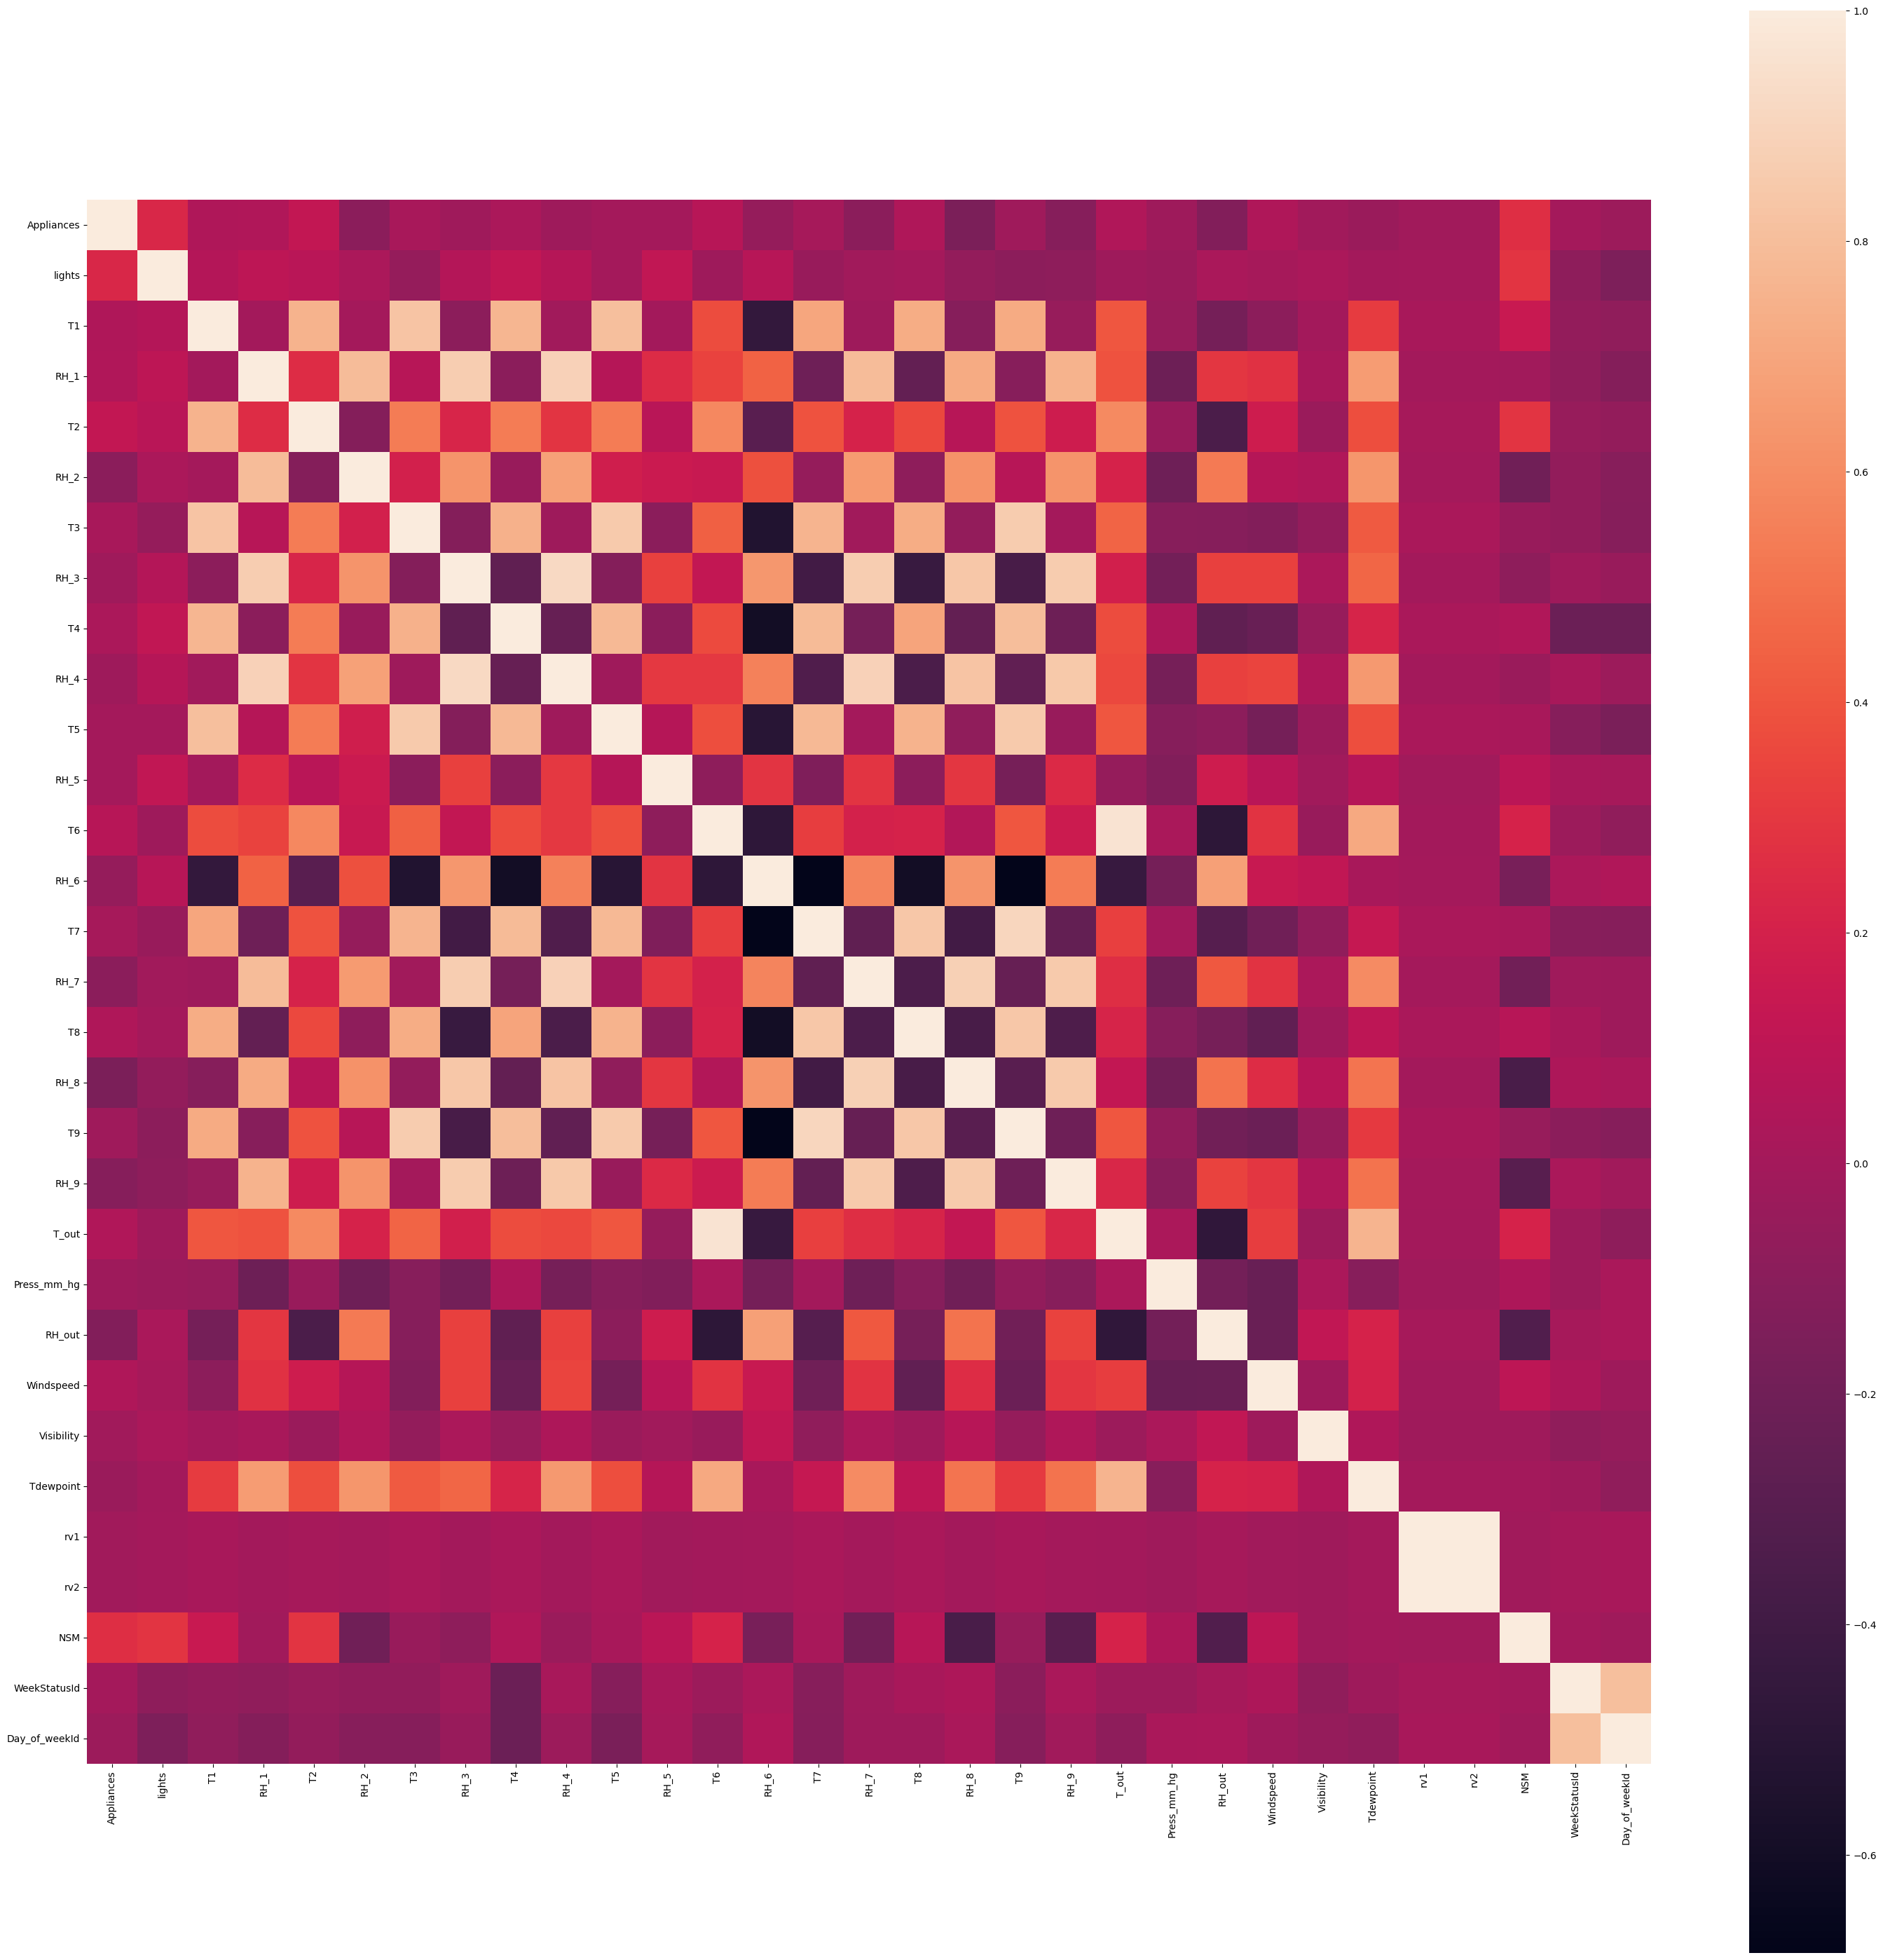

In [47]:
# Matriz de correlação novamente
plt.figure(figsize = (36, 36))

sns.heatmap(dataset_train[[
    "Appliances",
    "lights",
    "T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out",
    "Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2","NSM","WeekStatusId","Day_of_weekId"
]].corr(), vmax=1., square=True)

In [48]:
# T5, T4 e T2, T3, e H3 ganharam um pouquinho mais de correlação. Pensar outras formas/opções de melhorar o dataset:

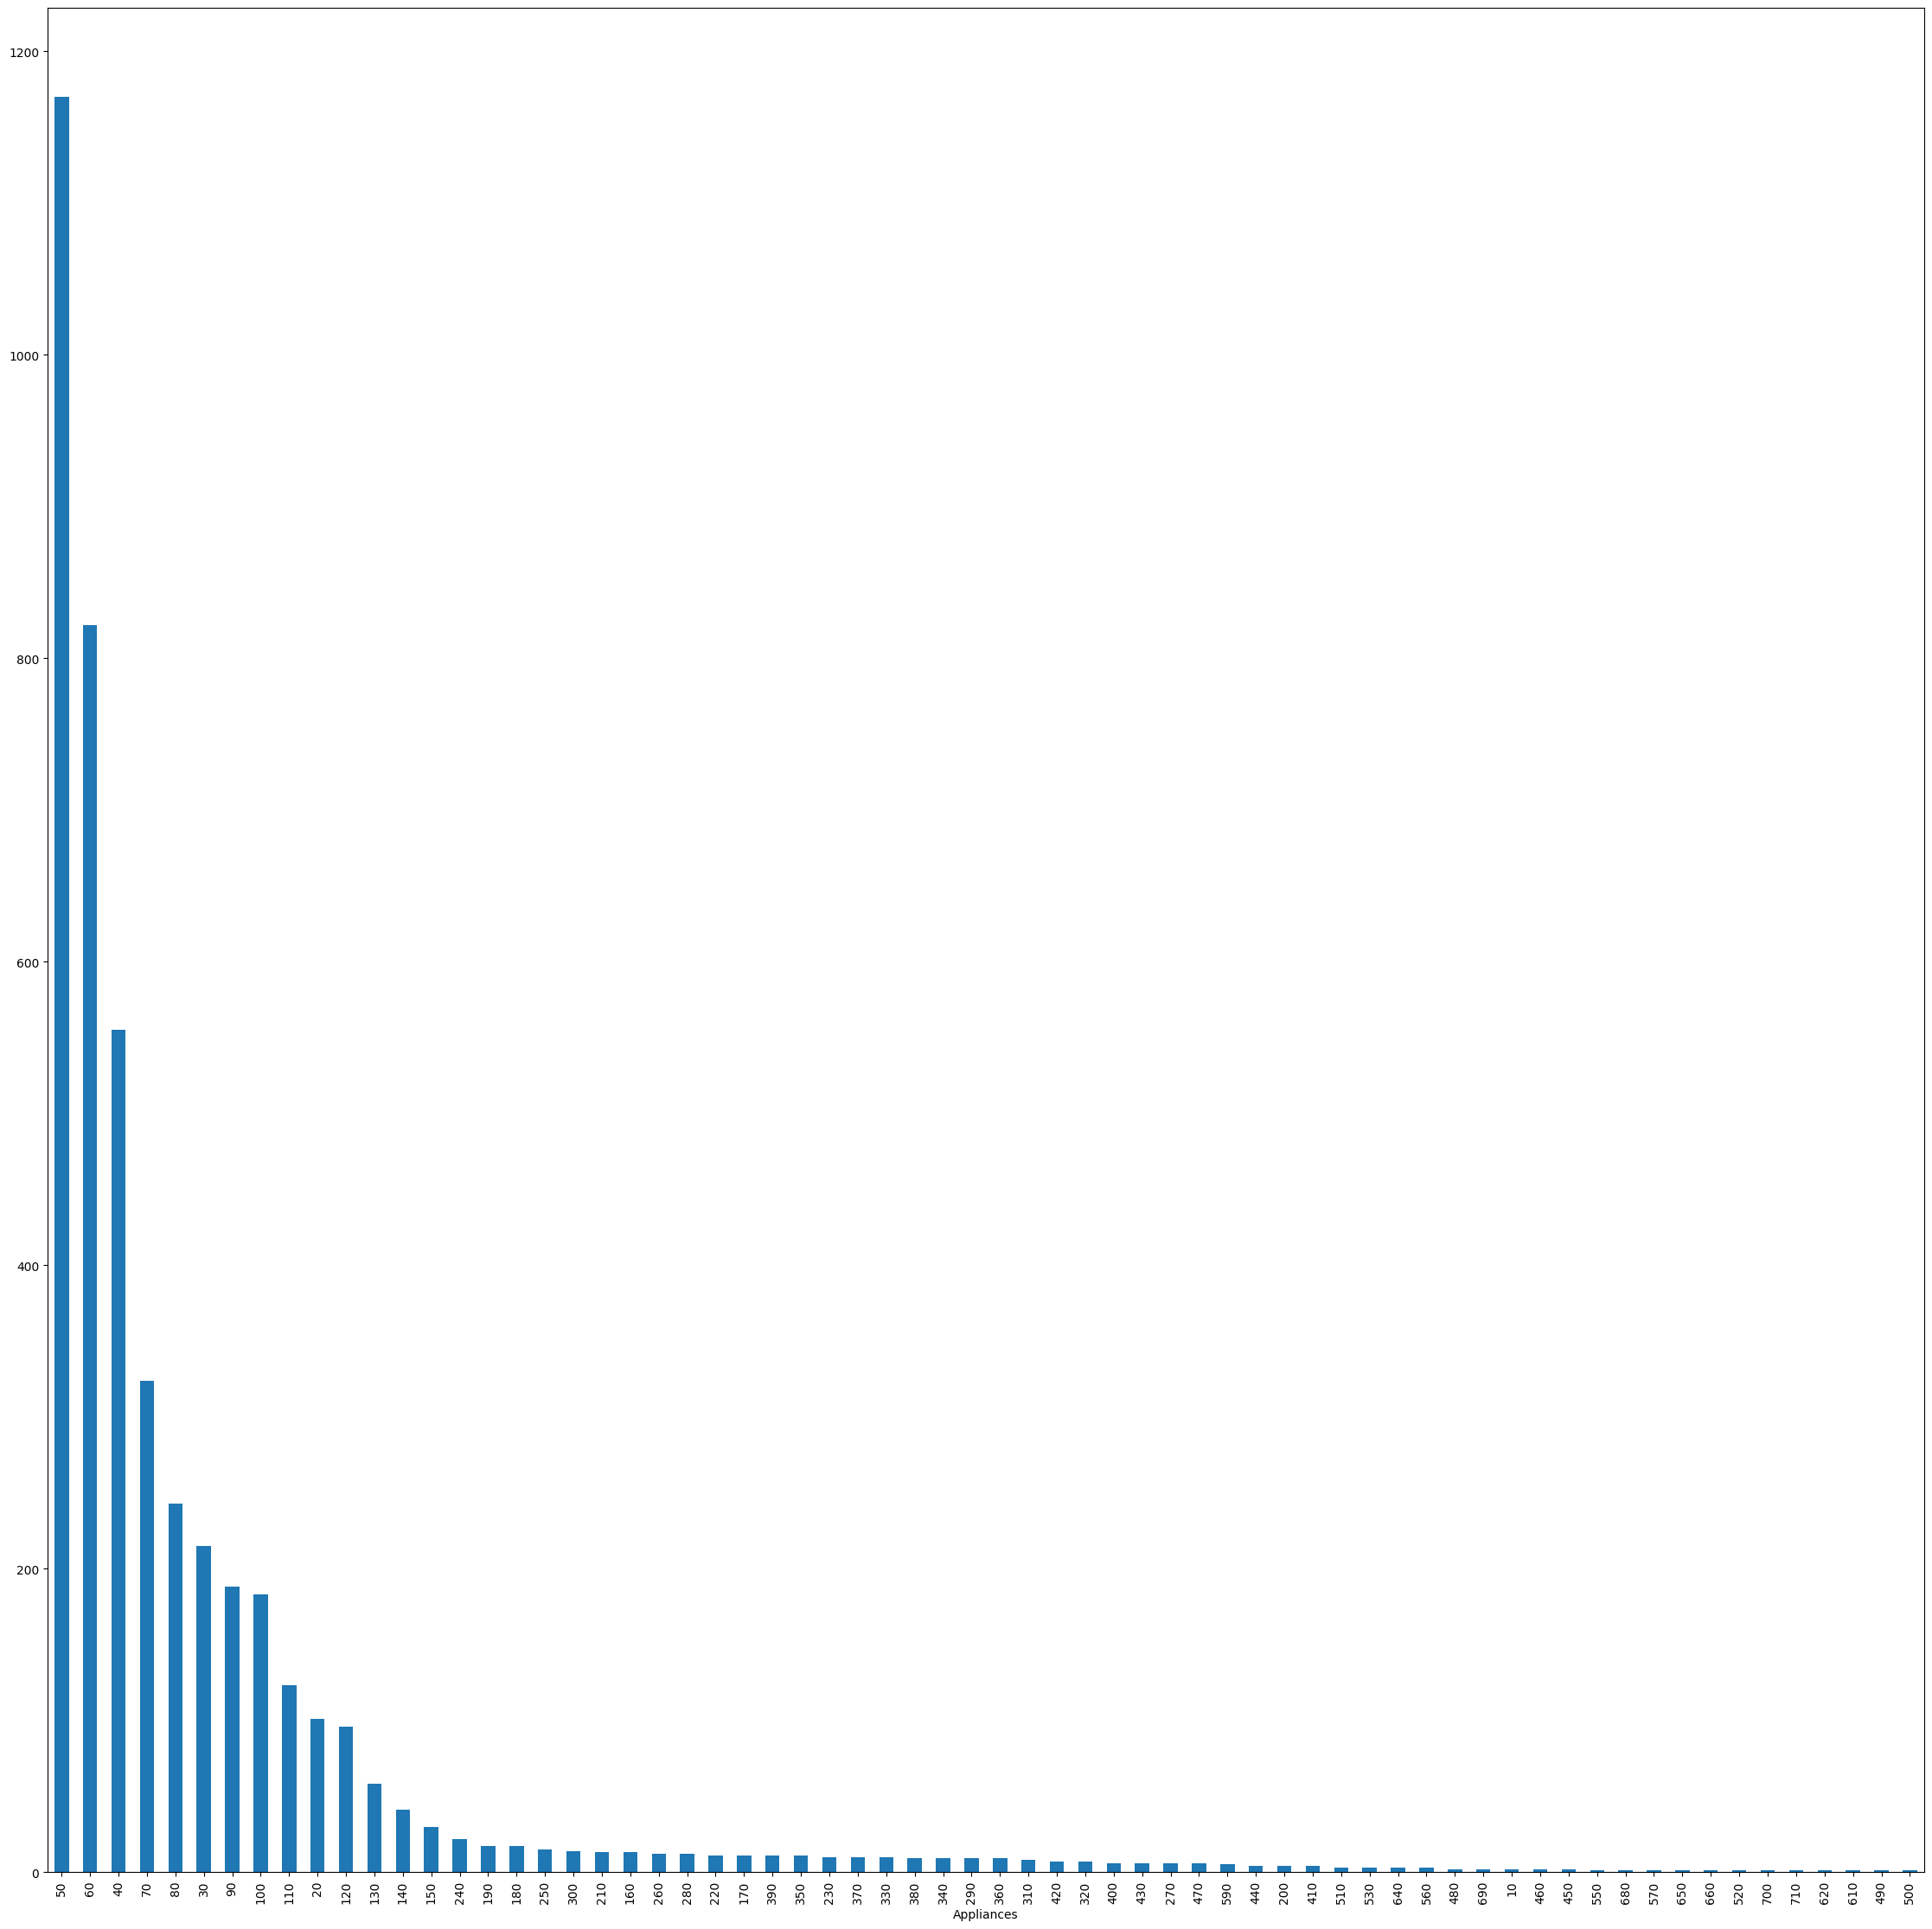

In [49]:
# Quqnaitdade por consumo de apaerelhos novamente:
plt.figure(figsize = (28, 28))
plt.xlabel("Appliances/Consumo")
count_values_class_type = dataset_train["Appliances"].value_counts()
count_values_class_type.plot(kind="bar")

plt.show()

In [50]:
dataset_train.shape

(4491, 34)

In [51]:
dataset_train["Appliances"].unique()


array([ 60,  50, 110, 100, 400, 240,  30,  40, 310, 120, 140, 390,  90,
       290, 130, 370,  70, 230, 350,  20,  80, 330, 360, 180, 170, 420,
       340, 510, 190, 380, 160, 480, 410, 220, 250, 280, 300, 560, 470,
       530, 590, 210, 150, 260,  10, 320, 640, 430, 200, 690, 440, 650,
       680, 550, 270, 570, 460, 660, 520, 700, 450, 710, 620, 610, 490,
       500])

In [52]:
len(dataset_train["Appliances"].unique())

66

### Seleçao de Atributos

#### RandomForest

##### correlação dos parametros com o target Appliances

In [53]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [54]:
columns_to_train = [
    "Appliances",
    "lights",
    "T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out",
    "Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2","NSM","WeekStatusId","Day_of_weekId"
]

In [55]:
X = dataset_train.drop(["Appliances", "WeekStatus", "Day_of_week", "date"], axis=1)  # Remova a coluna target e categoricas de week status e day of week
y = dataset_train["Appliances"]  # Coluna target

In [56]:
# X

In [57]:
# Treinar Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [58]:
# Obter importância das features
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [59]:
print(importance_df)

          Feature  Importance
27            NSM    0.191169
15             T8    0.053247
4            RH_2    0.041867
20    Press_mm_hg    0.041587
11             T6    0.039449
6            RH_3    0.037948
0          lights    0.035044
8            RH_4    0.033972
5              T3    0.033837
10           RH_5    0.033589
2            RH_1    0.030997
18           RH_9    0.030020
14           RH_7    0.029471
1              T1    0.028685
3              T2    0.028141
12           RH_6    0.027975
16           RH_8    0.026305
7              T4    0.026235
22      Windspeed    0.025793
9              T5    0.025012
24      Tdewpoint    0.024480
23     Visibility    0.023390
21         RH_out    0.023295
19          T_out    0.023197
13             T7    0.021545
26            rv2    0.018708
25            rv1    0.018691
17             T9    0.016270
29  Day_of_weekId    0.008914
28   WeekStatusId    0.001166


In [60]:
# Selecionar as top 15 features de 28
selected_features = importance_df["Feature"].head(15).tolist()
X_selected = X[selected_features]

In [61]:
X_selected.head(5)

,NSM,T8,RH_2,Press_mm_hg,T6,RH_3,lights,RH_4,T3,RH_5,RH_1,RH_9,RH_7,T1,T2
1,61800,18.200000,44.722500,733.600000,6.833333,44.790000,30,45.992500,19.79,55.20,46.693333,45.560000,41.560000,19.890000,19.200000
2,62400,18.200000,44.626667,733.700000,6.560000,44.933333,30,45.890000,19.79,55.09,46.300000,45.500000,41.433333,19.890000,19.200000
4,64200,18.100000,44.500000,734.000000,6.300000,44.933333,40,45.730000,19.79,55.03,46.026667,45.290000,41.260000,19.890000,19.200000
16,75600,19.000000,44.760000,735.400000,5.763333,46.433333,30,48.193333,20.29,82.46,46.060000,44.966667,43.460000,21.133333,20.426667
17,76200,19.066667,44.760000,735.466667,5.656667,46.223333,20,47.800000,20.39,82.59,45.800000,44.900000,43.400000,21.200000,20.500000


In [62]:
features_to_correlate = ["Appliances"] + selected_features

# Filtrar apenas essas colunas no dataset original
correlation_data = dataset_train[features_to_correlate]

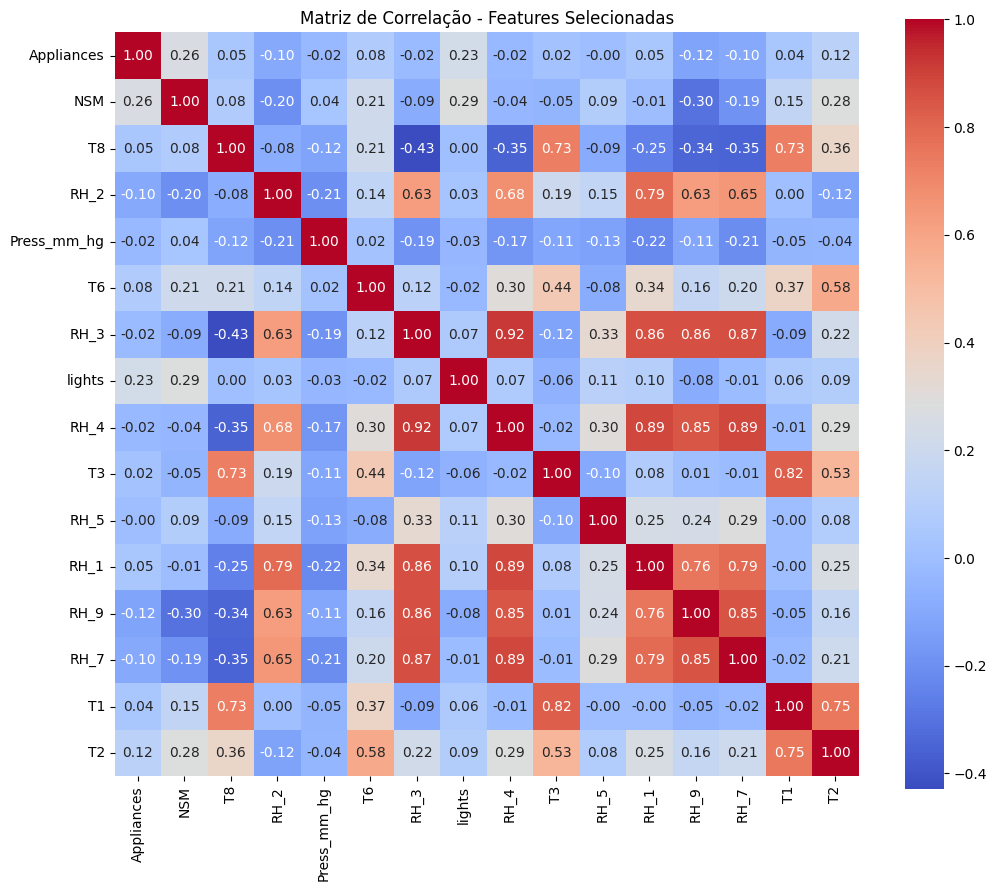

In [63]:
# Matriz de correlação novamente , com os valores


# Calcular matriz de correlação
correlation_matrix = correlation_data.corr()

# Plotar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, square=True)
plt.title("Matriz de Correlação - Features Selecionadas")
plt.show()

Alguns com pouca relação entre si, mas está com uma média ou boa correlação com o target(Appliances)

#### SVM

In [64]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

In [65]:
# Separar features e target
X = dataset_train.drop(["Appliances", "WeekStatus", "Day_of_week", "date"], axis=1)
y = dataset_train["Appliances"]  # Coluna target

In [66]:
# Treinar SVM com RFE
svr = SVR(kernel="linear")
rfe = RFE(estimator=svr, n_features_to_select=15)  # Selecionar as top 15 features
rfe.fit(X, y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=15)

In [67]:
# Obter as features selecionadas
selected_features = X.columns[rfe.support_]
X_selected = X[selected_features]

print("Selected Features:", selected_features)

Selected Features: Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'RH_8',
       'T9', 'RH_9', 'T_out', 'WeekStatusId'],
      dtype='object')


In [68]:
#           Feature  Importance
# 27            NSM    0.191169
# 15             T8    0.053247
# 4            RH_2    0.041867
# 20    Press_mm_hg    0.041587
# 11             T6    0.039449
# 6            RH_3    0.037948
# 0          lights    0.035044
# 8            RH_4    0.033972
# 5              T3    0.033837
# 10           RH_5    0.033589
# 2            RH_1    0.030997
# 18           RH_9    0.030020
# 14           RH_7    0.029471
# 1              T1    0.028685
# 3              T2    0.028141
# 12           RH_6    0.027975
# 16           RH_8    0.026305
# 7              T4    0.026235
# 22      Windspeed    0.025793
# 9              T5    0.025012



# 24      Tdewpoint    0.024480
# 23     Visibility    0.023390
# 21         RH_out    0.023295
# 19          T_out    0.023197
# 13             T7    0.021545
# 26            rv2    0.018708
# 25            rv1    0.018691
# 17             T9    0.016270
# 29  Day_of_weekId    0.008914
# 28   WeekStatusId    0.001166

In [69]:
X_selected.head(15)

,T1,RH_1,T2,RH_2,T3,T4,T5,T6,T7,T8,RH_8,T9,RH_9,T_out,WeekStatusId
1,19.890000,46.693333,19.200000,44.722500,19.790000,19.000000,17.166667,6.833333,17.200000,18.200000,48.863333,17.066667,45.560000,6.483333,0
2,19.890000,46.300000,19.200000,44.626667,19.790000,18.926667,17.166667,6.560000,17.200000,18.200000,48.730000,17.000000,45.500000,6.366667,0
4,19.890000,46.026667,19.200000,44.500000,19.790000,18.890000,17.133333,6.300000,17.133333,18.100000,48.590000,17.000000,45.290000,6.016667,0
16,21.133333,46.060000,20.426667,44.760000,20.290000,19.390000,17.760000,5.763333,17.856667,19.000000,49.760000,16.890000,44.966667,6.000000,0
17,21.200000,45.800000,20.500000,44.760000,20.390000,19.390000,18.356667,5.656667,17.790000,19.066667,49.700000,16.890000,44.900000,5.933333,0
18,21.290000,45.900000,20.533333,45.090000,20.390000,19.390000,18.356667,5.530000,17.890000,19.133333,49.633333,16.890000,44.790000,5.866667,0
22,21.533333,44.966667,20.790000,44.360000,20.426667,19.600000,19.033333,5.656667,17.790000,19.356667,49.030000,16.823333,44.530000,5.650000,0
25,21.600000,44.360000,21.000000,43.833333,20.500000,20.596667,19.200000,6.000000,17.790000,19.340000,48.950000,16.823333,44.433333,5.800000,0
30,21.500000,44.363333,20.890000,43.845000,20.290000,20.730000,19.290000,5.590000,17.700000,19.390000,50.723333,16.890000,45.560000,5.500000,0
33,21.290000,44.826667,20.700000,44.000000,20.200000,20.566667,19.200000,5.530000,17.700000,19.463333,51.500000,16.890000,45.790000,5.266667,0


In [70]:
selected_features.tolist()

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'WeekStatusId']

In [71]:
dataset_train.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,WeekStatusId,Day_of_weekId
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday,0,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday,0,0
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.03,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday,0,0
16,2016-01-11 21:00:00,110,30,21.133333,46.060000,20.426667,44.760000,20.29,46.433333,19.390000,48.193333,17.760000,82.46,5.763333,86.063333,17.856667,43.460000,19.000000,49.760000,16.890000,44.966667,6.000000,735.400000,87.000000,6.000000,40.000000,3.900000,13.361033,13.361033,75600,Weekday,Monday,0,0
17,2016-01-11 21:10:00,110,20,21.200000,45.800000,20.500000,44.760000,20.39,46.223333,19.390000,47.800000,18.356667,82.59,5.656667,85.590000,17.790000,43.400000,19.066667,49.700000,16.890000,44.900000,5.933333,735.466667,87.166667,6.000000,40.000000,3.866667,19.305705,19.305705,76200,Weekday,Monday,0,0


In [72]:
features_to_correlate = ["Appliances"] + selected_features.tolist()

# Filtrar apenas essas colunas no dataset original
correlation_data = dataset_train[features_to_correlate]

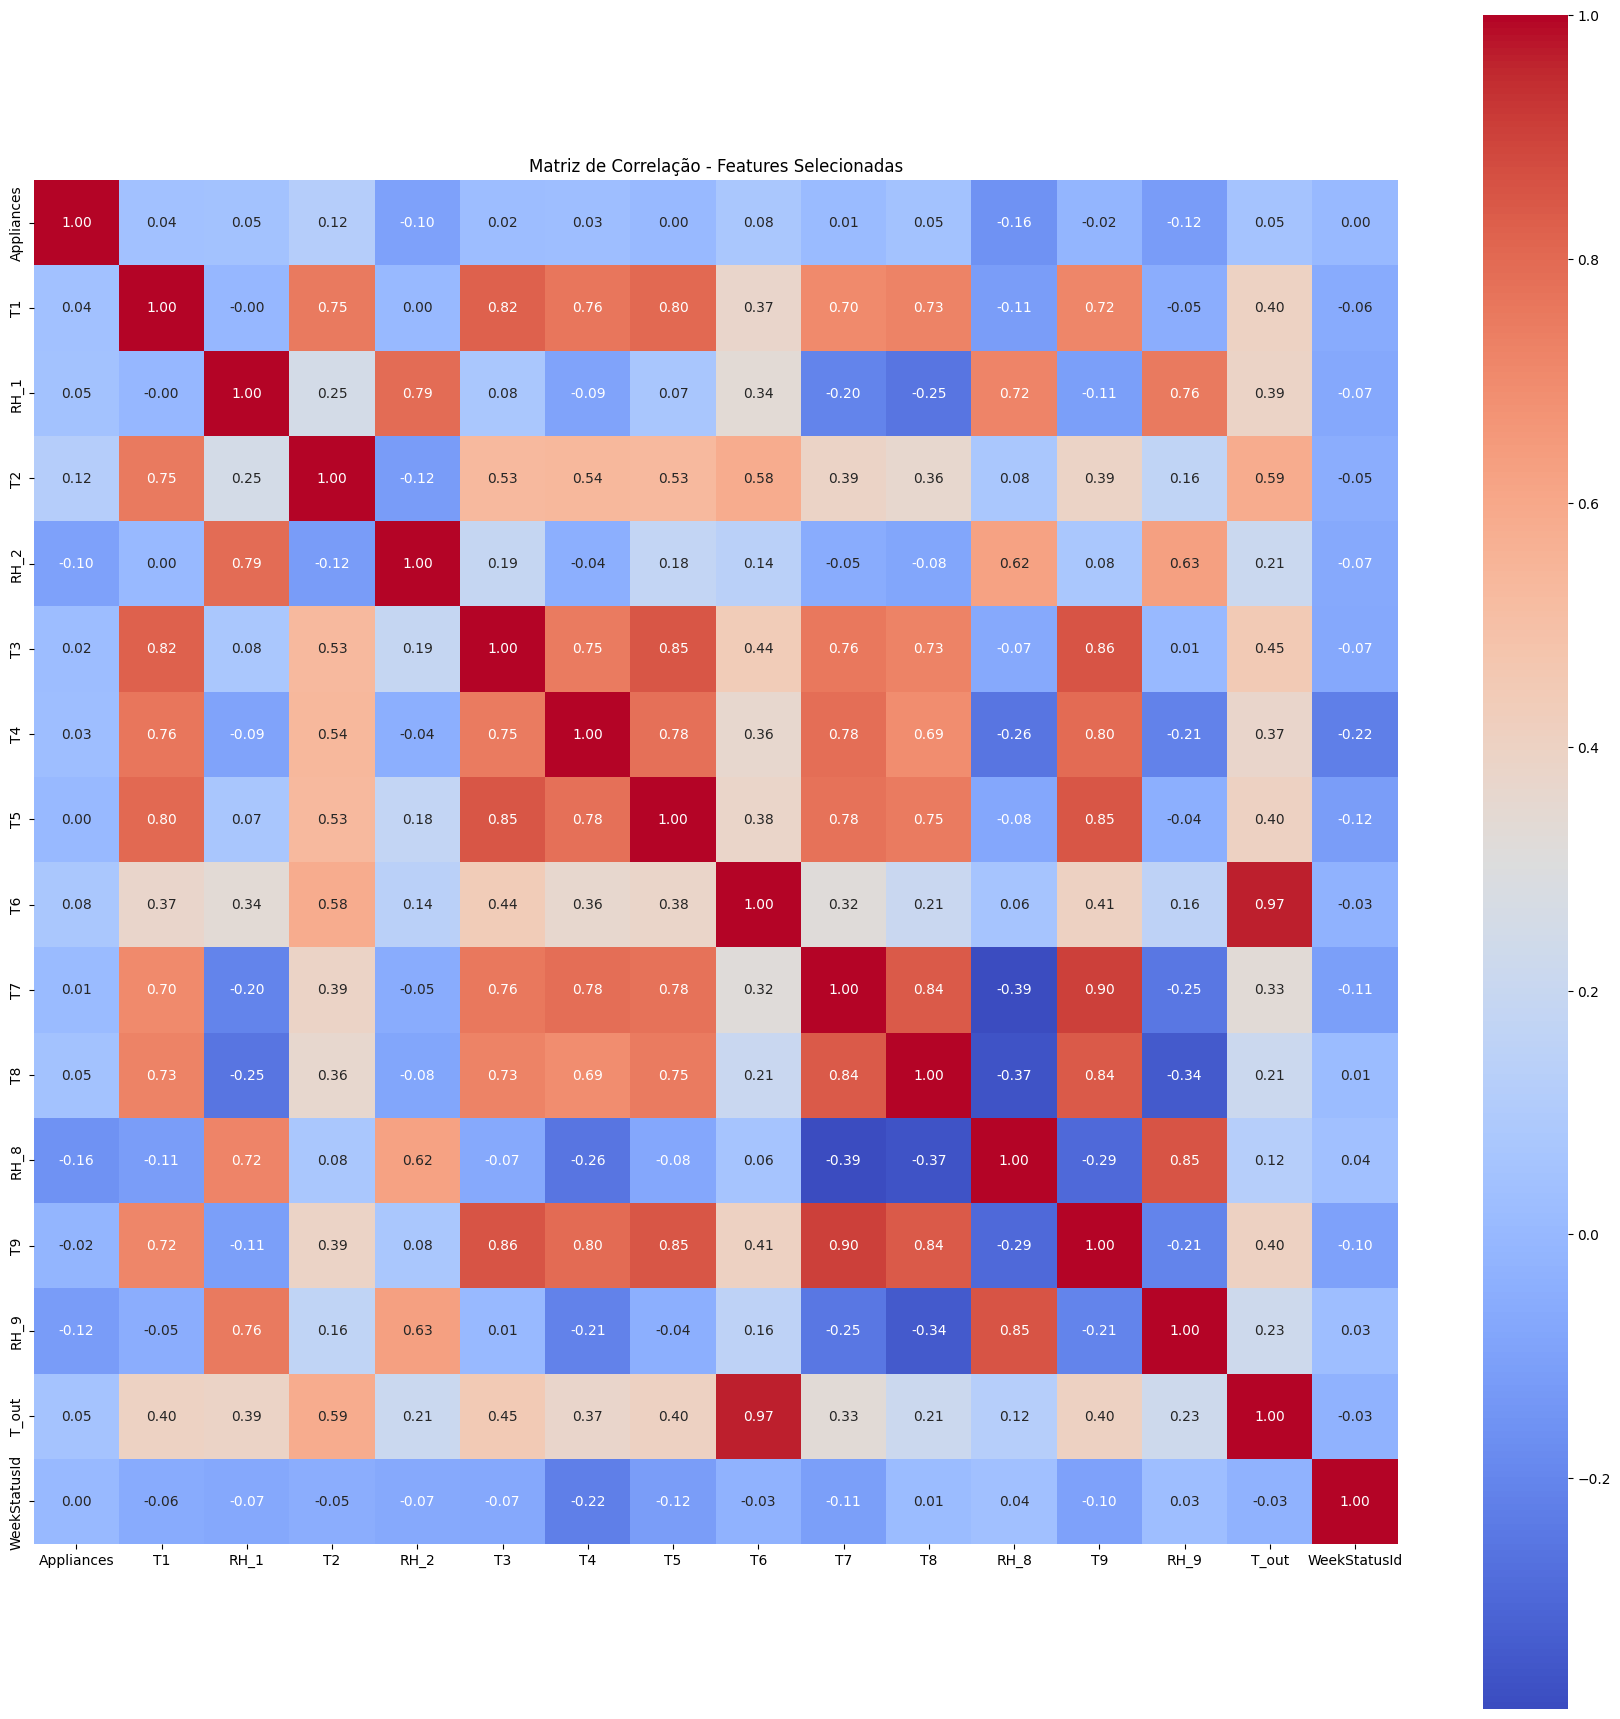

In [73]:
# Matriz de correlação novamente , com os valores

# Calcular matriz de correlação
correlation_matrix = correlation_data.corr()

# Plotar heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, square=True)
plt.title("Matriz de Correlação - Features Selecionadas")
plt.show()

#### comparando as listas das Top Features:

In [74]:
list_decision_tree = ["NSM","T8","RH_2","Press_mm_hg","T6","RH_3","lights", "RH_4","T3","RH_5","RH_1","RH_9","RH_7","T1","T2"]

list_decision_svm = ['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'WeekStatusId']


# Converter listas em conjuntos
set1 = set(list_decision_tree)
set2 = set(list_decision_svm)

# Elementos comuns
common_elements = set1 & set2

# Elementos incomuns (únicos em cada lista)
unique_to_list1 = set1 - set2
unique_to_list2 = set2 - set1

print("Elementos comuns:", common_elements)
print("Elementos únicos na lista 1:", unique_to_list1)
print("Elementos únicos na lista 2:", unique_to_list2)

Elementos comuns: {'T6', 'T1', 'T8', 'RH_9', 'T2', 'T3', 'RH_2', 'RH_1'}
Elementos únicos na lista 1: {'Press_mm_hg', 'lights', 'NSM', 'RH_3', 'RH_7', 'RH_5', 'RH_4'}
Elementos únicos na lista 2: {'T5', 'T9', 'T4', 'T7', 'RH_8', 'WeekStatusId', 'T_out'}


#### Novo Dataset com as colunas para treino:

In [75]:
new_list_columns_to_train = ['T6', 'T1', 'T8', 'RH_9', 'T2', 'T3', 'RH_2', 'RH_1','Press_mm_hg', 'lights', 'NSM', 'RH_3', 'RH_7', 'RH_5', 'RH_4',
                             'T5', 'T9', 'T4', 'T7', 'RH_8', 'WeekStatusId', 'T_out', 'Appliances']

In [76]:
new_data_set_train = dataset_train[new_list_columns_to_train]

In [77]:
new_data_set_train.head(5)

,T6,T1,T8,RH_9,T2,T3,RH_2,RH_1,Press_mm_hg,lights,NSM,RH_3,RH_7,RH_5,RH_4,T5,T9,T4,T7,RH_8,WeekStatusId,T_out,Appliances
1,6.833333,19.890000,18.200000,45.560000,19.200000,19.79,44.722500,46.693333,733.600000,30,61800,44.790000,41.560000,55.20,45.992500,17.166667,17.066667,19.000000,17.200000,48.863333,0,6.483333,60
2,6.560000,19.890000,18.200000,45.500000,19.200000,19.79,44.626667,46.300000,733.700000,30,62400,44.933333,41.433333,55.09,45.890000,17.166667,17.000000,18.926667,17.200000,48.730000,0,6.366667,50
4,6.300000,19.890000,18.100000,45.290000,19.200000,19.79,44.500000,46.026667,734.000000,40,64200,44.933333,41.260000,55.03,45.730000,17.133333,17.000000,18.890000,17.133333,48.590000,0,6.016667,50
16,5.763333,21.133333,19.000000,44.966667,20.426667,20.29,44.760000,46.060000,735.400000,30,75600,46.433333,43.460000,82.46,48.193333,17.760000,16.890000,19.390000,17.856667,49.760000,0,6.000000,110
17,5.656667,21.200000,19.066667,44.900000,20.500000,20.39,44.760000,45.800000,735.466667,20,76200,46.223333,43.400000,82.59,47.800000,18.356667,16.890000,19.390000,17.790000,49.700000,0,5.933333,110


<Axes: >

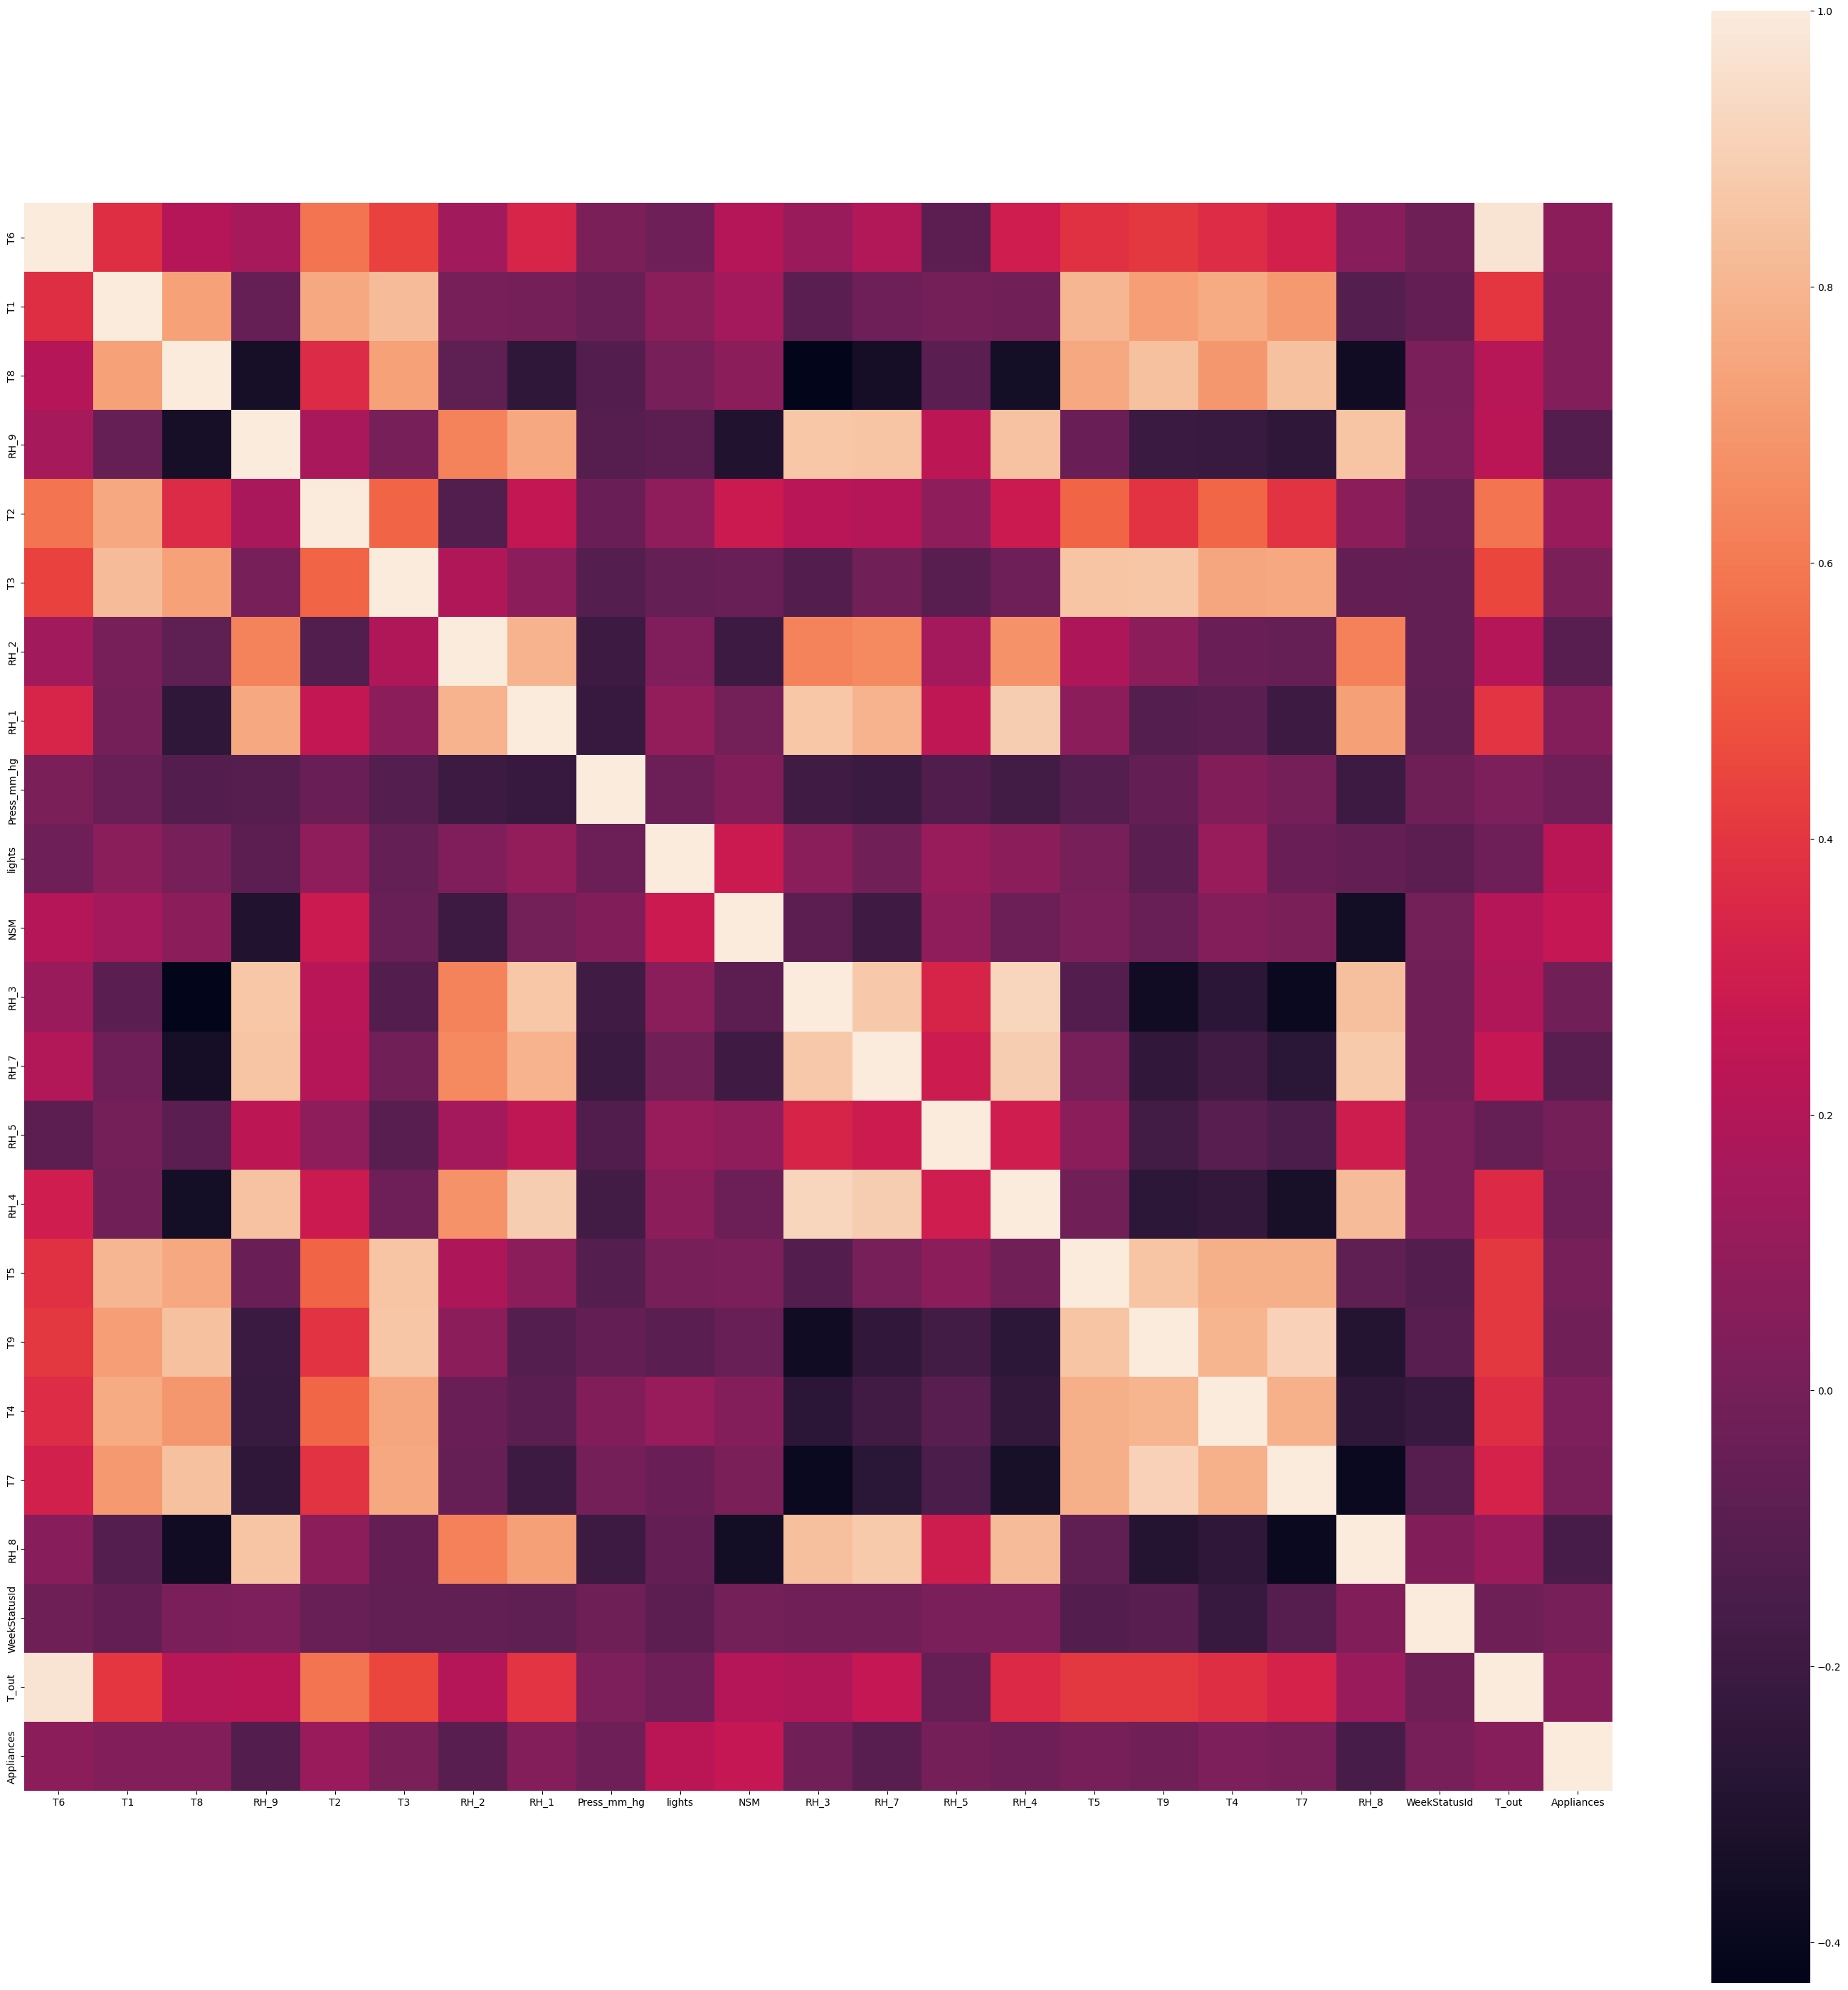

In [78]:
# Matriz de correlação novamente
plt.figure(figsize = (36, 36))

sns.heatmap(new_data_set_train[['T6', 'T1', 'T8', 'RH_9', 'T2', 'T3', 'RH_2', 'RH_1','Press_mm_hg', 'lights', 'NSM', 'RH_3', 'RH_7', 'RH_5', 'RH_4',
                             'T5', 'T9', 'T4', 'T7', 'RH_8', 'WeekStatusId', 'T_out', 'Appliances']].corr(), vmax=1., square=True)

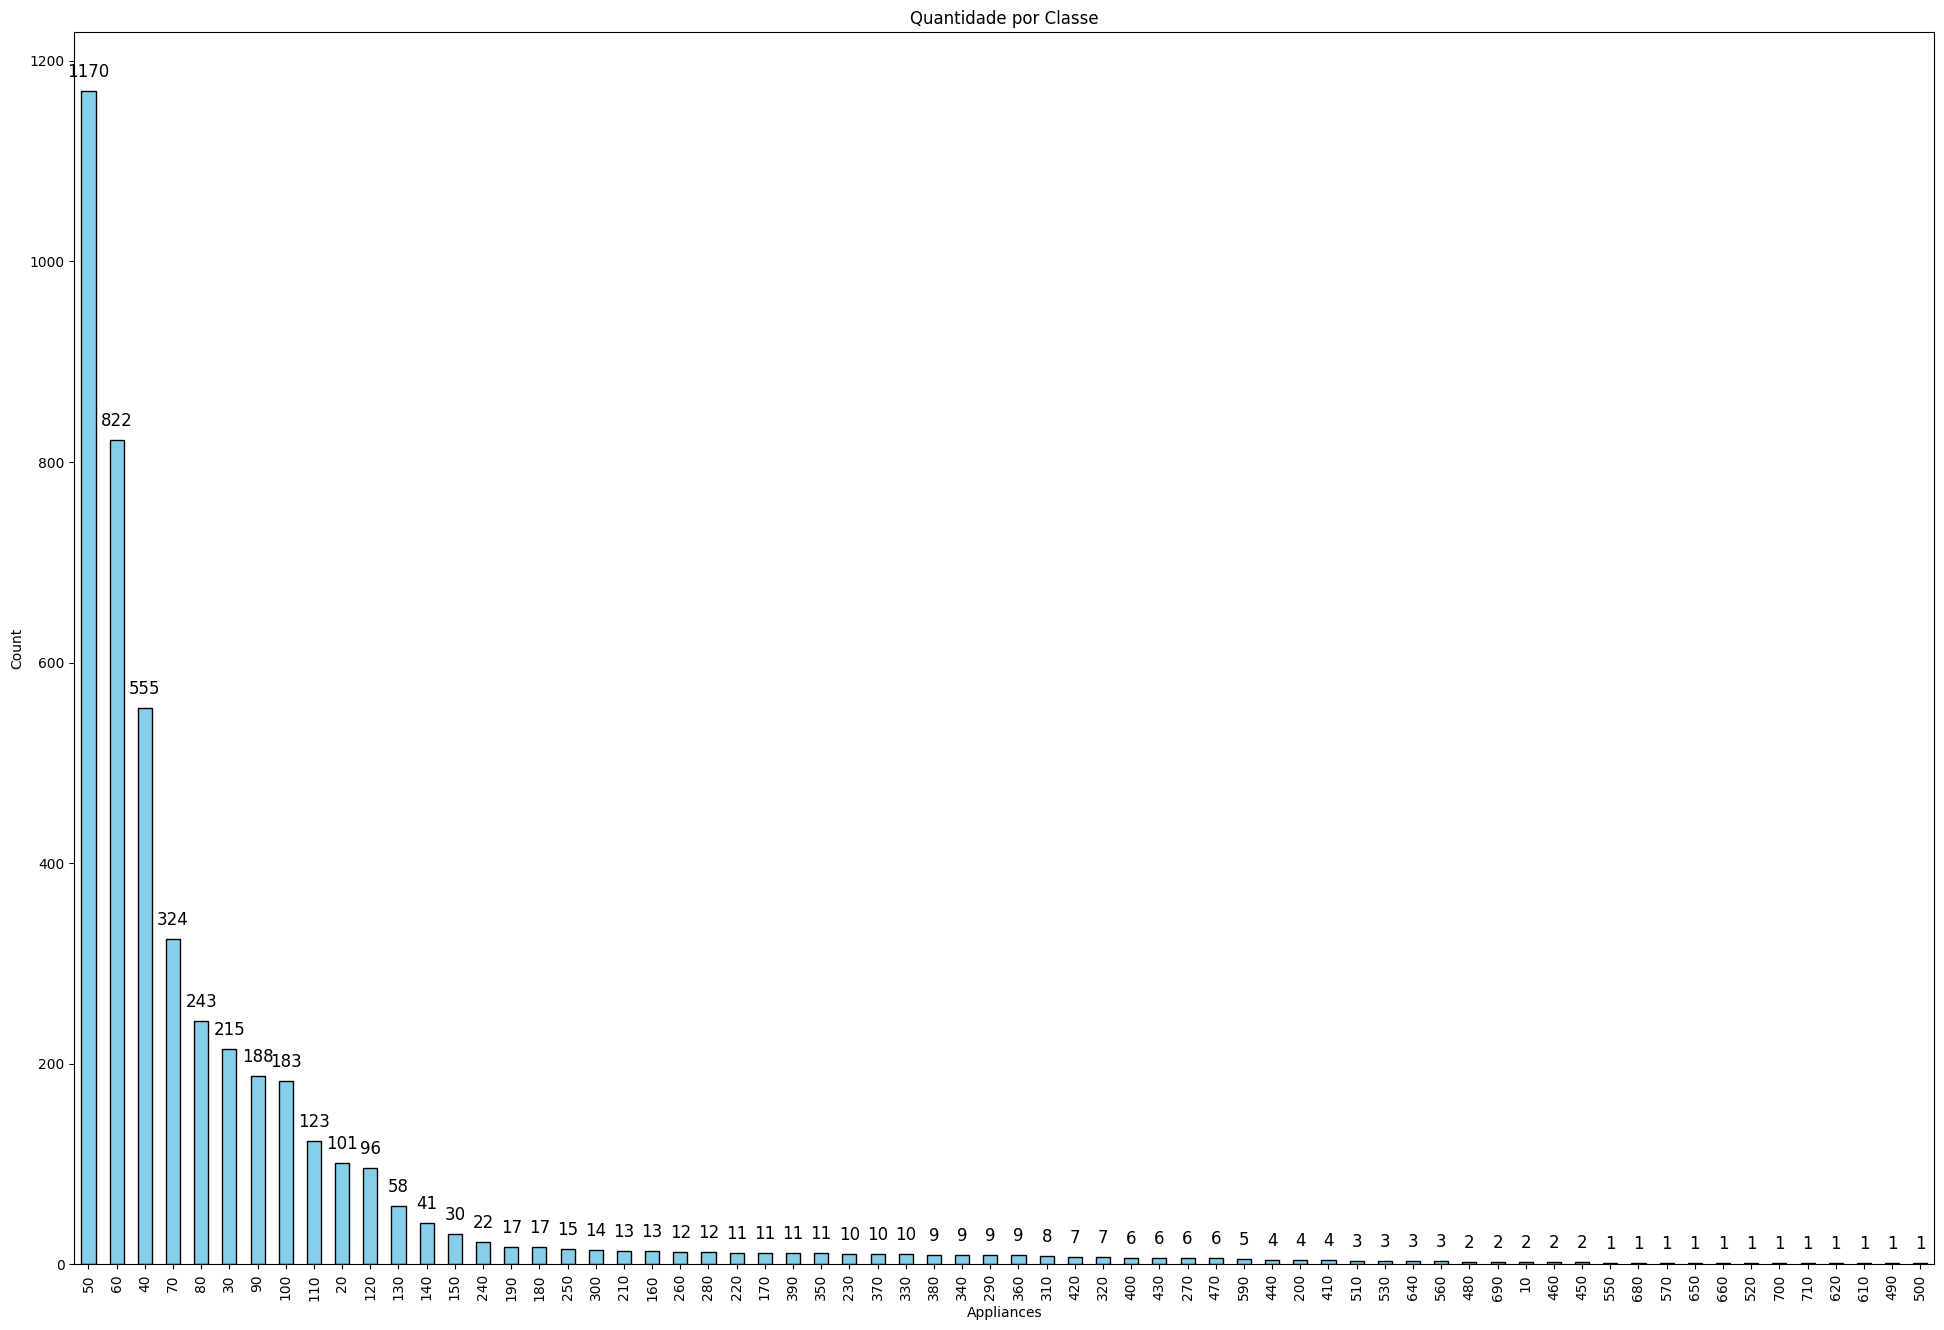

In [79]:
# Quantidade por Appliances novamente:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Appliances")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = new_data_set_train["Appliances"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

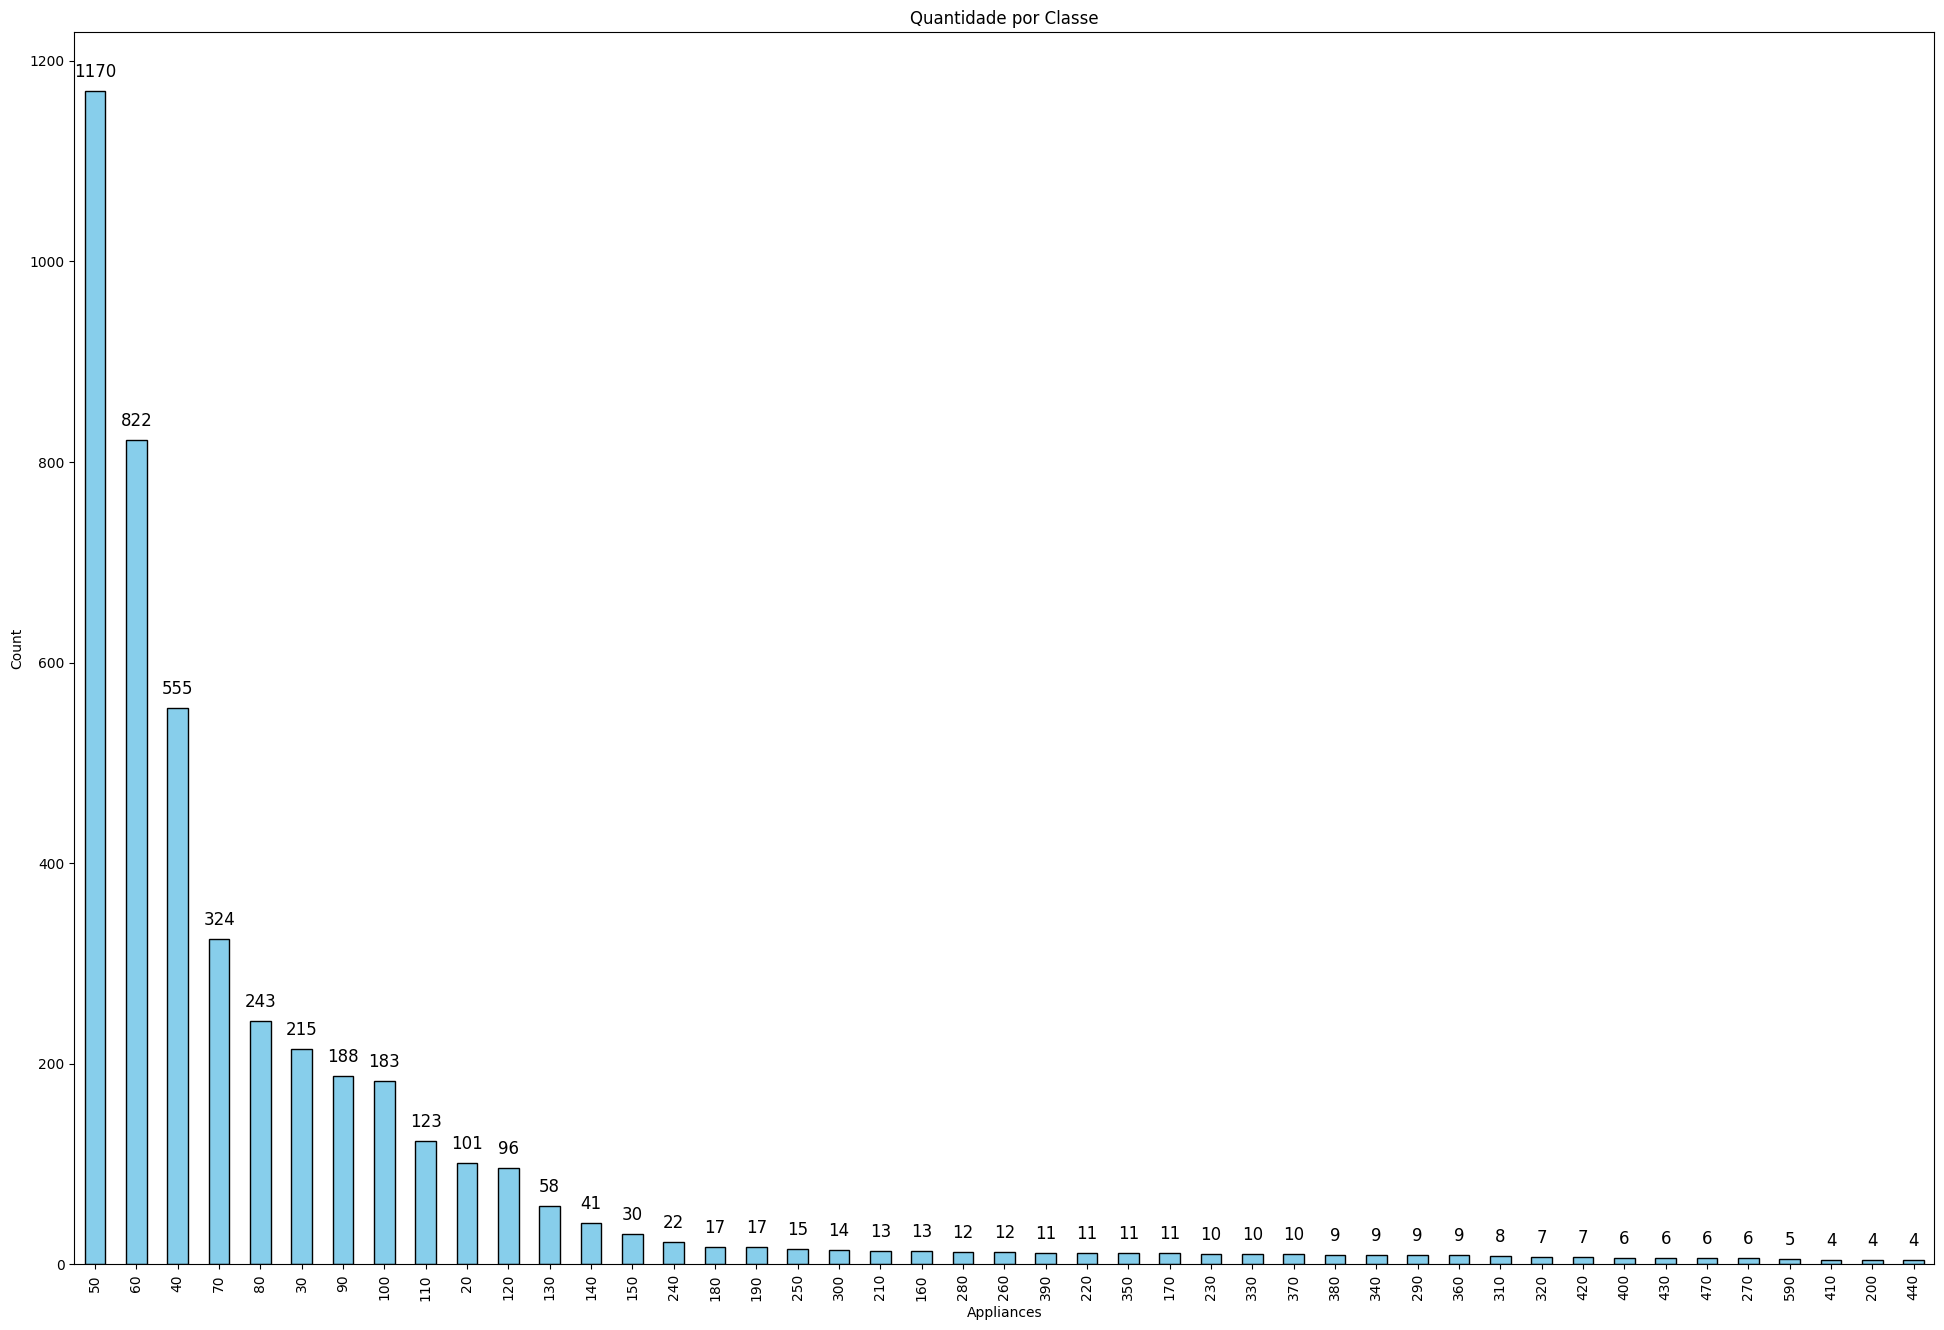

In [82]:
# Quantidade por Appliances novamente:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Appliances")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = new_data_set_train["Appliances"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

In [81]:
# Contar o número de ocorrências de cada classe em Appliances. Remover as q sao maiores que 3
new_data_set_train = new_data_set_train.groupby("Appliances").filter(lambda x: len(x) > 3)

##### SMOTE para melhor balanceamento dos dados:

In [83]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [84]:
from sklearn.model_selection import train_test_split

x = new_data_set_train.drop("Appliances", axis=1)
y = new_data_set_train["Appliances"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

# Exibir distribuição inicial
print("Distribuição antes do SMOTE:", Counter(y_train))

Distribuição antes do SMOTE: Counter({50: 936, 60: 657, 40: 444, 70: 259, 80: 194, 30: 172, 90: 150, 100: 146, 110: 98, 20: 81, 120: 77, 130: 46, 140: 33, 150: 24, 240: 18, 180: 14, 190: 14, 250: 12, 300: 11, 260: 10, 280: 10, 160: 10, 210: 10, 220: 9, 390: 9, 170: 9, 350: 9, 370: 8, 230: 8, 330: 8, 340: 7, 380: 7, 290: 7, 360: 7, 420: 6, 310: 6, 320: 6, 470: 5, 270: 5, 430: 5, 400: 5, 590: 4, 200: 3, 440: 3, 410: 3})


In [85]:
smote = SMOTE(sampling_strategy={70: 460, 80: 420, 30: 380, 90: 330, 100: 330, 110: 300, 20: 300, 120: 300, 130: 290, 140: 190,
                                150: 190, 240: 190, 180: 170, 190: 170, 250: 150, 300: 150, 210: 150, 160: 150, 280: 150, 260: 150,
                                390: 130, 220: 130, 350: 130, 170: 130, 230: 130, 330: 130, 370: 130, 380: 130, 340: 130, 290: 130,
                                360: 130, 310: 130, 320: 130, 420: 130, 400: 130, 430: 130, 470: 130, 270: 130, 590: 130, 410: 130,
                                200: 130, 440: 130}, random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [86]:
# Exibir distribuição após o SMOTE
print("Distribuição após o SMOTE:", Counter(y_train_resampled))

Distribuição após o SMOTE: Counter({50: 936, 60: 657, 70: 460, 40: 444, 80: 420, 30: 380, 90: 330, 100: 330, 110: 300, 120: 300, 20: 300, 130: 290, 140: 190, 240: 190, 150: 190, 180: 170, 190: 170, 260: 150, 280: 150, 160: 150, 210: 150, 250: 150, 300: 150, 220: 130, 390: 130, 470: 130, 170: 130, 340: 130, 350: 130, 370: 130, 270: 130, 200: 130, 430: 130, 380: 130, 290: 130, 440: 130, 360: 130, 420: 130, 400: 130, 310: 130, 230: 130, 330: 130, 590: 130, 320: 130, 410: 130})


In [87]:
# Criar novo DataFrame com os dados balanceados (opcional)
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=["Appliances"])
balanced_dataset = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

In [88]:
balanced_dataset.shape

(9817, 23)

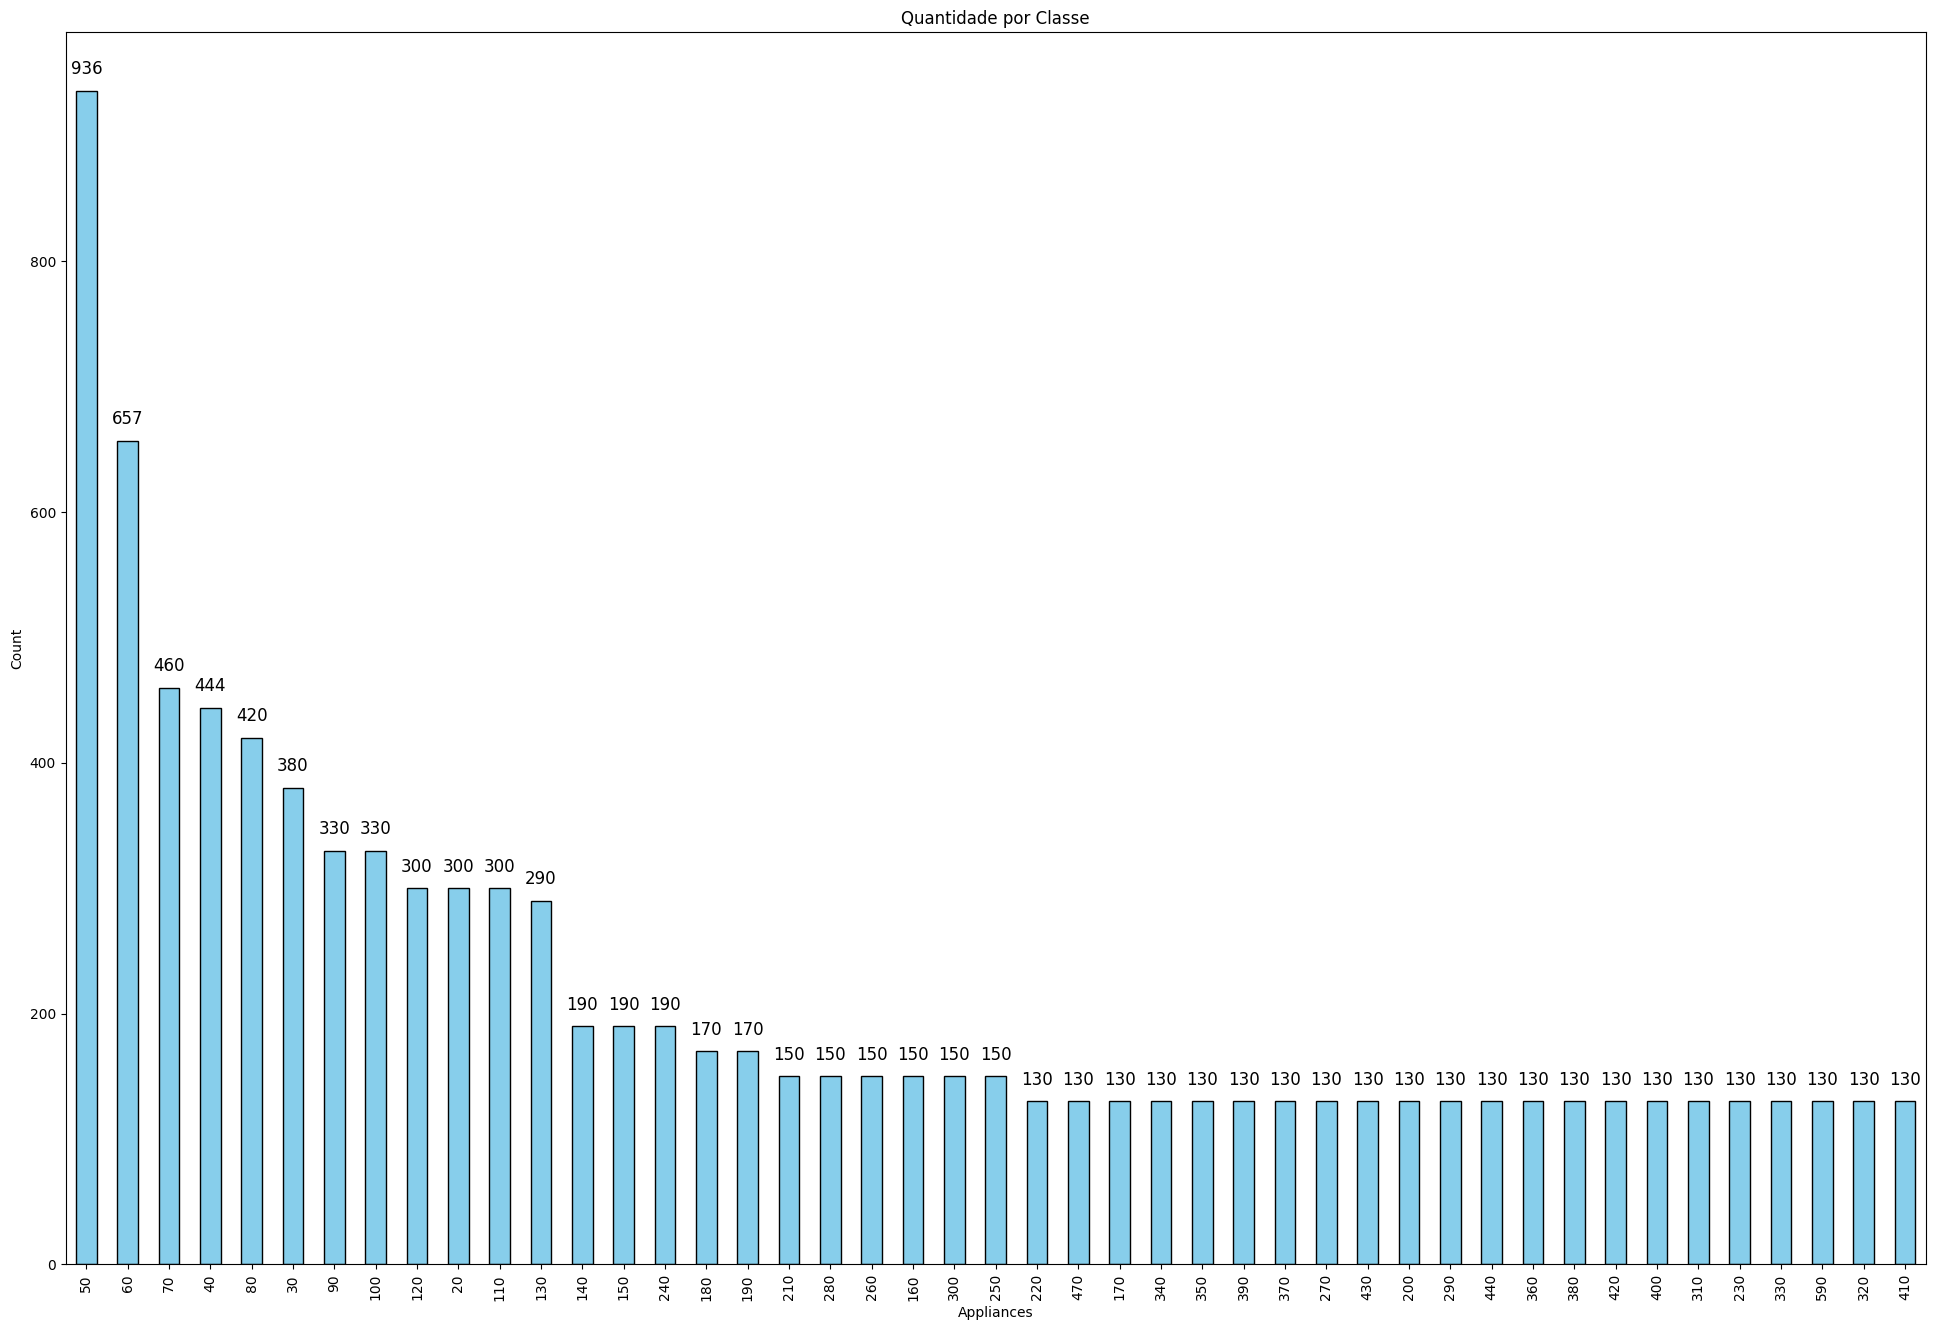

In [89]:
# Quantidade por Appliances novamente:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Appliances")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = balanced_dataset["Appliances"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

In [90]:
#remover da class 50
qtd_to_remove = 50
rows_with_1 = balanced_dataset[balanced_dataset["Appliances"] == 50]
rows_to_remove = rows_with_1.sample(n=qtd_to_remove, random_state=42)
balanced_dataset = balanced_dataset.drop(rows_to_remove.index)


In [91]:
#remover da class 60
qtd_to_remove = 20
rows_with_1 = balanced_dataset[balanced_dataset["Appliances"] == 60]
rows_to_remove = rows_with_1.sample(n=qtd_to_remove, random_state=42)
balanced_dataset = balanced_dataset.drop(rows_to_remove.index)

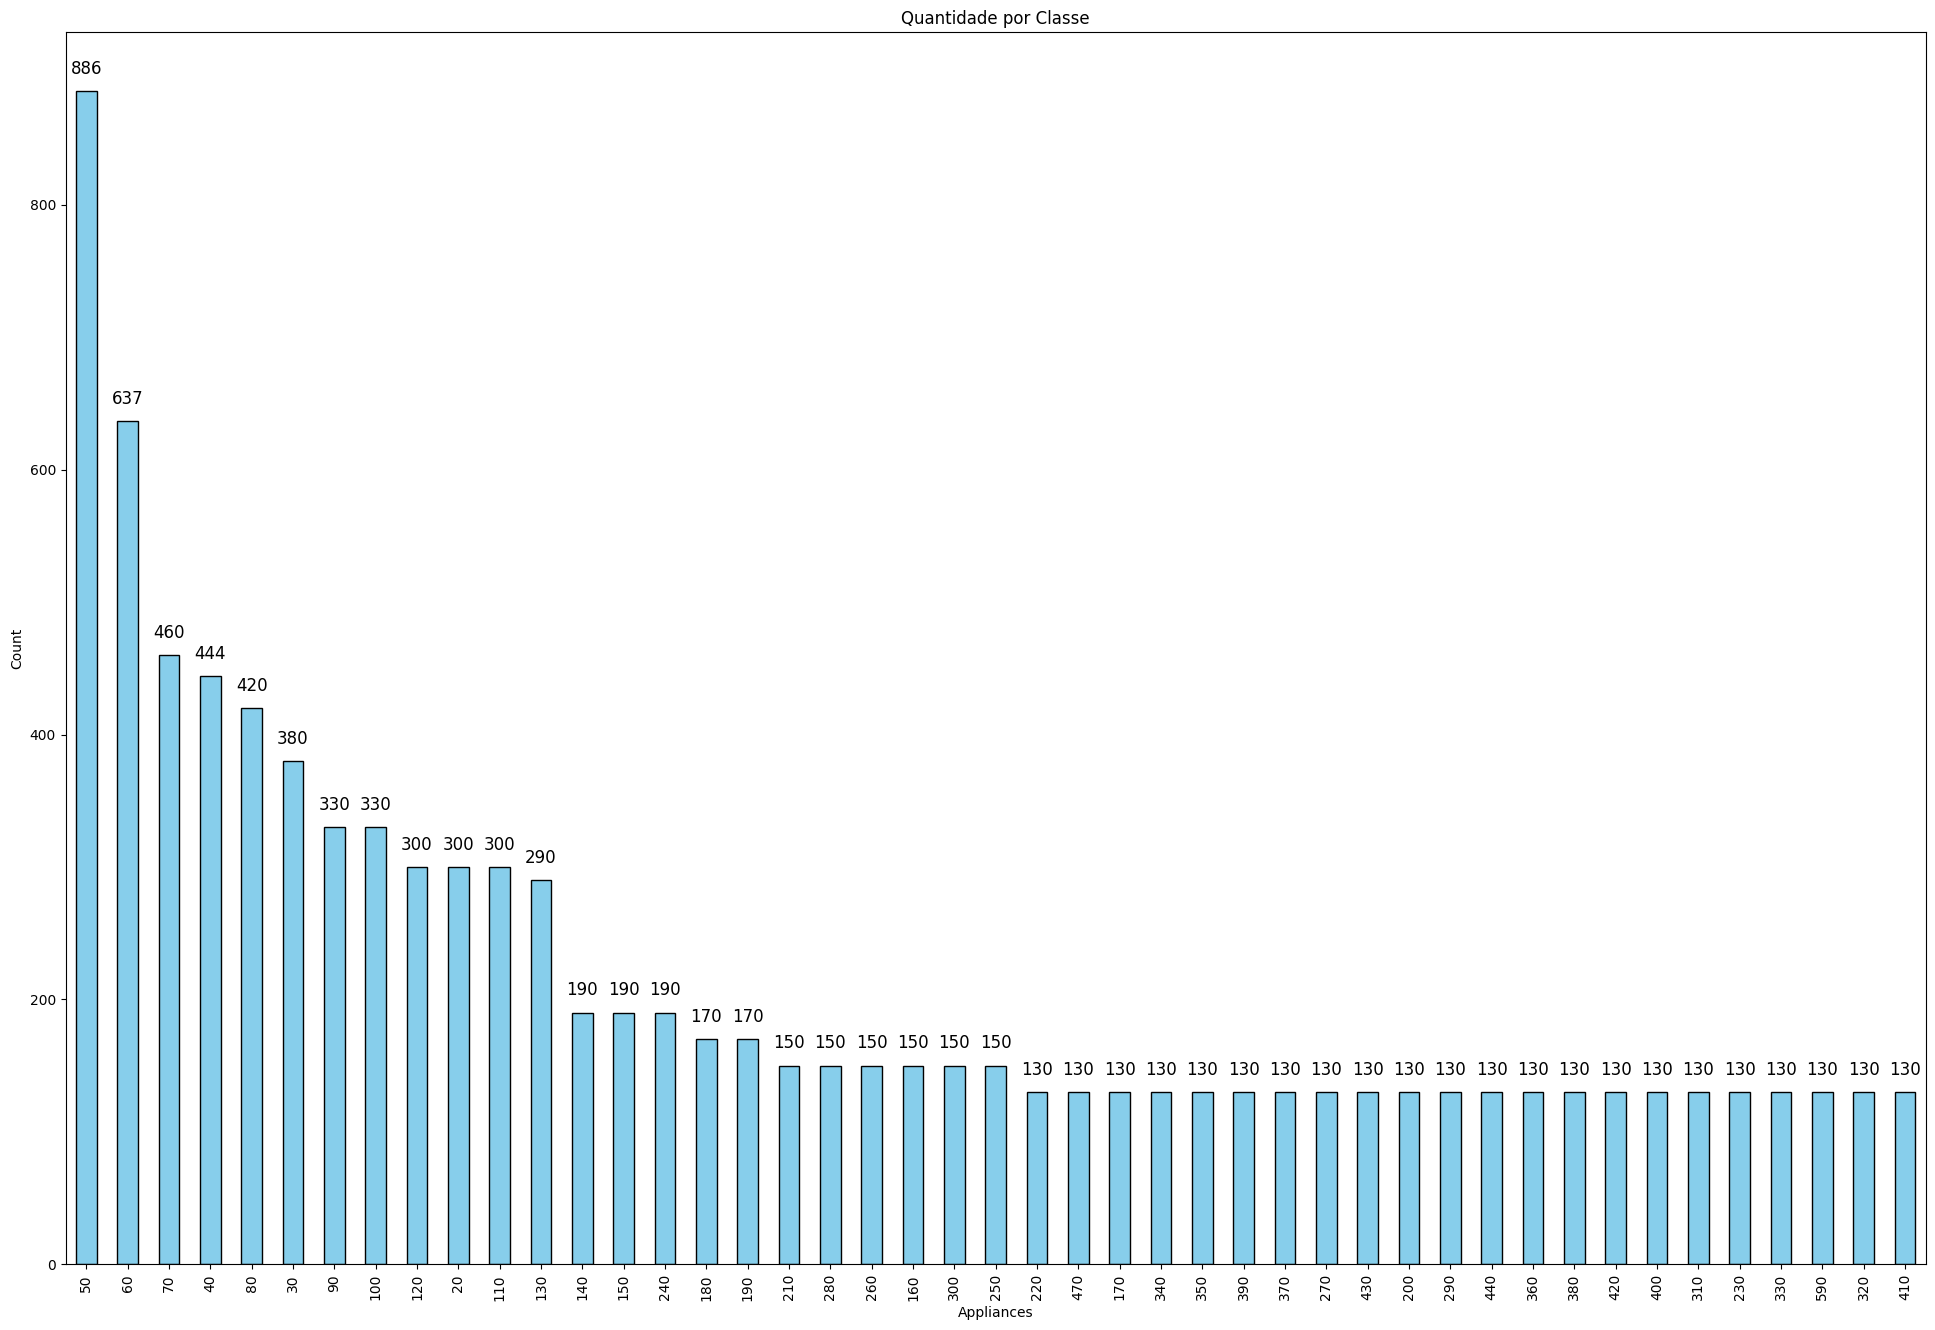

In [92]:
# Quantidade por Appliances novamente:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Appliances")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = balanced_dataset["Appliances"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

### Modelo Com Gradient Boosting

In [93]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

list_columns_to_train = ['T6', 'T1', 'T8', 'RH_9', 'T2', 'T3', 'RH_2', 'RH_1','Press_mm_hg', 'lights', 'NSM', 'RH_3', 'RH_7', 'RH_5', 'RH_4',
                             'T5', 'T9', 'T4', 'T7', 'RH_8', 'WeekStatusId', 'T_out']

X = balanced_dataset[list_columns_to_train]
y = balanced_dataset["Appliances"]  # Coluna target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
# Cria o classificador
estimator = GradientBoostingClassifier(learning_rate=0.08, n_estimators = 500, max_depth = 6)

In [ ]:
# Cria o modelo
estimator.fit(X_train, y_train)

In [ ]:
# Previsões das classes (labels)
pred = estimator.predict(X_test)

In [ ]:
# Score nos dados de teste (Acurácia)
acc = estimator.score(X_test, y_test)
print('Acurácia: %.4f' % acc)

In [ ]:
# Previsão das probabilidades das classes
est.predict_proba(X_test)[0]